## 2. Paper plots

Plots for super-greenhouse climatology paper (Dewey, Abraham, and Goldblatt 2024) \
Data required for plotting is available via project repository. 

Maura Dewey (maura.dewey@misu.su.se), 2023 

In [135]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
import seaborn as sns 
import cartopy
from statsmodels.tsa.seasonal import STL
import cmasher as cm
from scipy import stats
import scipy
import textwrap
from SGE_utils import *
import matplotlib
from scipy.stats import linregress
from scipy.stats import norm
from scipy.optimize import curve_fit
import pyhomogeneity as hg

In [2]:
SGE_ts = xr.open_dataset('../SGE_timeseries_2002_2023_v7.nc').sel(time=slice('2003-01-01','2022-12-31'))

In [3]:
def lat_weighted_mean(x):
    weights = np.cos(np.deg2rad(x.lat))
    return x.weighted(weights).mean(['lat', 'lon'])

c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning:

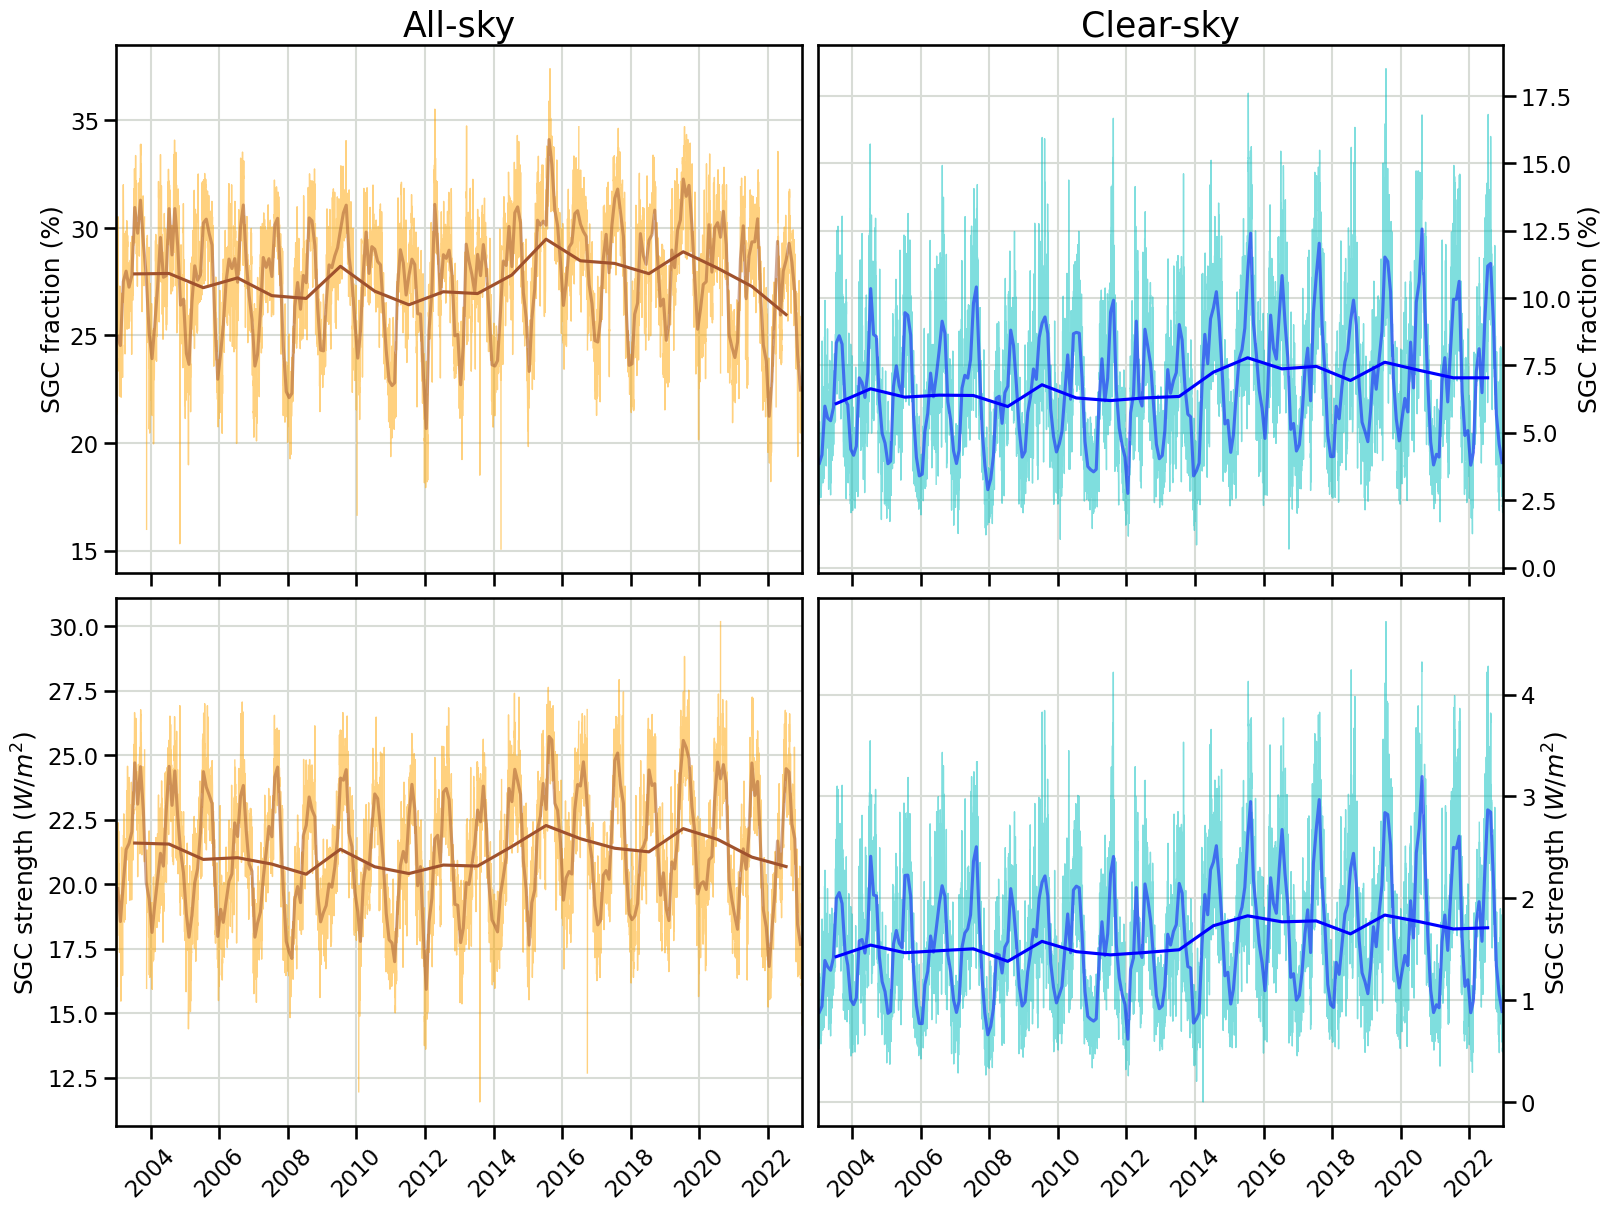

In [4]:
#Figure 1, timeseries trends. 
# Clear-sky and all-sky area fraction of tropical oceans in SGC [%], and mean tropical SGC strength [W/m^2].

frc_all = SGE_ts.SGE_frac_all2*100
frc_all_na = frc_all.where(SGE_ts['airs_flag']==0) #remove days without AIRS measurements from all-sky data (79 days total)
frc_all_clean = frc_all_na.where(frc_all_na>15)
frc_all_mm = frc_all_clean.resample(time='M', skipna=True).mean()
frc_all_ann = frc_all_clean.resample(time='Y', skipna=True).mean()

frc_clr = SGE_ts.SGE_frac_clr2*100 #frc"2" is fraction of SGE divided by total area with observed clear-sky OLR
frc_clr_clean = frc_clr.where(frc_clr>0)
frc_clr_mm = frc_clr_clean.resample(time='M', skipna=True).mean()
frc_clr_ann = frc_clr_clean.resample(time='Y', skipna=True).mean()

str_all = lat_weighted_mean(SGE_ts.SGE_str_all)
str_all_clean = str_all.where(SGE_ts['airs_flag']==0) #remove days without AIRS measurements from all-sky data (79 days total)
str_all_clean = str_all_clean.where(str_all_clean>9)
str_all_mm = str_all_clean.resample(time='M', skipna=True).mean()
str_all_ann = str_all_clean.resample(time='Y', skipna=True).mean()

str_clr = lat_weighted_mean(SGE_ts.SGE_str_clr)
str_clr_mm = str_clr.resample(time='M', skipna=True).mean()
str_clr_ann = str_clr.resample(time='Y', skipna=True).mean()

with sns.plotting_context("talk"):

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12), sharex=True, sharey=False, constrained_layout=True)
    axes[0,0].plot(pd.to_datetime(frc_all_clean['time']), frc_all_clean, color='orange',linewidth=1,alpha=0.5)
    axes[0,0].plot(pd.to_datetime(frc_all_mm['time'])- pd.Timedelta(15, 'D'), frc_all_mm, color='sienna',alpha=0.5)
    axes[0,0].plot(pd.to_datetime(frc_all_ann['time'])- pd.Timedelta(169, 'D'), frc_all_ann, color='sienna')
    axes[0,0].autoscale(enable=True, axis='x', tight=True)
    axes[0,0].set_title('All-sky', fontsize=25)
    axes[0,0].set_ylabel('SGC fraction (%)')
    axes[0,0].grid(color='xkcd:light grey')
    
    axes[0,1].plot(pd.to_datetime(frc_clr_clean['time']), frc_clr_clean, linewidth=1,color='c',alpha=0.5)
    axes[0,1].plot(pd.to_datetime(frc_clr_mm['time'])- pd.Timedelta(15, 'D'), frc_clr_mm, color='b',alpha=0.5)
    axes[0,1].plot(pd.to_datetime(frc_clr_ann['time'])- pd.Timedelta(169, 'D'), frc_clr_ann, color='b')
    axes[0,1].set_title('Clear-sky', fontsize=25)
    axes[0,1].autoscale(enable=True, axis='x', tight=True)
    axes[0,1].yaxis.tick_right()
    axes[0,1].yaxis.set_label_position("right")
    axes[0,1].set_ylabel('SGC fraction (%)')
    axes[0,1].grid(color='xkcd:light grey')

    axes[1,0].plot(pd.to_datetime(str_all_clean['time']), str_all_clean, color='orange',linewidth=1,alpha=0.5)
    axes[1,0].plot(pd.to_datetime(str_all_mm['time'])- pd.Timedelta(15, 'D'), str_all_mm, color='sienna',alpha=0.5)
    axes[1,0].plot(pd.to_datetime(str_all_ann['time'])- pd.Timedelta(169, 'D'), str_all_ann, color='sienna')
    axes[1,0].autoscale(enable=True, axis='x', tight=True)
    axes[1,0].set_ylabel('SGC strength ($W/m^2$)')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].grid(color='xkcd:light grey')

    axes[1,1].plot(pd.to_datetime(str_clr['time']), str_clr, linewidth=1,color='c',alpha=0.5)
    axes[1,1].plot(pd.to_datetime(str_clr_mm['time'])- pd.Timedelta(15, 'D'), str_clr_mm,  color='b',alpha=0.5)
    axes[1,1].plot(pd.to_datetime(str_clr_ann['time'])- pd.Timedelta(169, 'D'), str_clr_ann, color='b')
    axes[1,1].autoscale(enable=True, axis='x', tight=True)
    axes[1,1].yaxis.tick_right()
    axes[1,1].yaxis.set_label_position("right")
    axes[1,1].set_ylabel('SGC strength ($W/m^2$)')
    axes[1,1].tick_params(axis='x', rotation=45)
    axes[1,1].grid(color='xkcd:light grey')

In [184]:
frc_all_clean.groupby('time.month') - frc_all_clean.groupby('time.month').mean('time')

<xarray.DataArray 'SGE_frac_all2' (time: 7305)> Size: 58kB
array([-1.48388449, -0.44731448, -2.44165365, ..., -5.19763099,
       -5.03508503, -5.50649843], shape=(7305,))
Coordinates:
  * time     (time) datetime64[ns] 58kB 2003-01-01 2003-01-02 ... 2022-12-31
    month    (time) int64 58kB 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12

In [187]:
# Figure 1 extra analyses: linear trends and change point analysis

frc_all_month = frc_all_clean.groupby('time.month').mean('time')
frc_all_deseasonalized = (frc_all_clean.resample(time='M').mean().groupby('time.month') - frc_all_month)
#frc_all_deseasonalized = frc_all_clean.groupby('time.month') - frc_all_month
t = np.arange(np.size(frc_all_deseasonalized['time']))
frc_all_lin = linregress(t, frc_all_deseasonalized)

str_all_month = str_all_clean.groupby('time.month').mean('time')
str_all_deseasonalized = (str_all_clean.resample(time='M').mean().groupby('time.month') - str_all_month)
#str_all_deseasonalized = str_all_clean.groupby('time.month') - str_all_month
str_all_lin = linregress(t, str_all_deseasonalized)

frc_clr_month = frc_clr_clean.groupby('time.month').mean('time')
frc_clr_deseasonalized = (frc_clr_clean.resample(time='M').mean().groupby('time.month') - frc_clr_month)
#frc_clr_deseasonalized = frc_clr_clean.groupby('time.month') - frc_clr_month
#frc_clr_month_median = frc_clr_clean.resample(time='M').median().groupby('time.month').median('time')
#frc_clr_deseasonalized_median = (frc_clr_clean.resample(time='M').median().groupby('time.month') - frc_clr_month_median)
frc_clr_lin = linregress(t, frc_clr_deseasonalized)
frc_clr_hg = hg.pettitt_test(frc_clr_deseasonalized)
#frc_clr_median_hg = hg.pettitt_test(frc_clr_deseasonalized_median)

str_clr_month = str_clr.groupby('time.month').mean('time')
str_clr_deseasonalized = (str_clr.resample(time='M').mean().groupby('time.month') - str_clr_month)
#str_clr_deseasonalized = str_clr.groupby('time.month') - str_clr_month
#str_clr_month_median = str_clr.resample(time='M').median().groupby('time.month').median('time')
#str_clr_deseasonalized_median = (str_clr.resample(time='M').median().groupby('time.month') - str_clr_month_median)
str_clr_lin = linregress(t, str_clr_deseasonalized)
str_clr_hg = hg.pettitt_test(str_clr_deseasonalized)
#str_clr_median_hg = hg.pettitt_test(str_clr_deseasonalized_median)

c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
C:\Users\made2928\AppData\Local\Temp\ipykernel_31684\90248327.py:15: SyntaxWarning: invalid escape sequence '\m'
  axes[0].hlines(mu1, xmin=pd.to_datetime(str_clr_deseasonalized['time'])[0], xmax=str_clr_loc, linestyles='--', colors='green',lw=1.5, label='$\mu$ : ' + str(round(mu1,2)))
C:\Users\made2928\AppData\Local\Temp\ipykernel_31684\90248327.py:16: SyntaxWarning: invalid escape sequence '\m'
  axes[0].hlines(mu2, xmin=str_clr_loc, xmax=pd.to_datetime(str_clr_deseasonalized['time'])[-1], linestyles=':', colors='green', lw=1.5, label='$\mu$ : ' + str(round(mu2,2)))
C:\Users\made2928

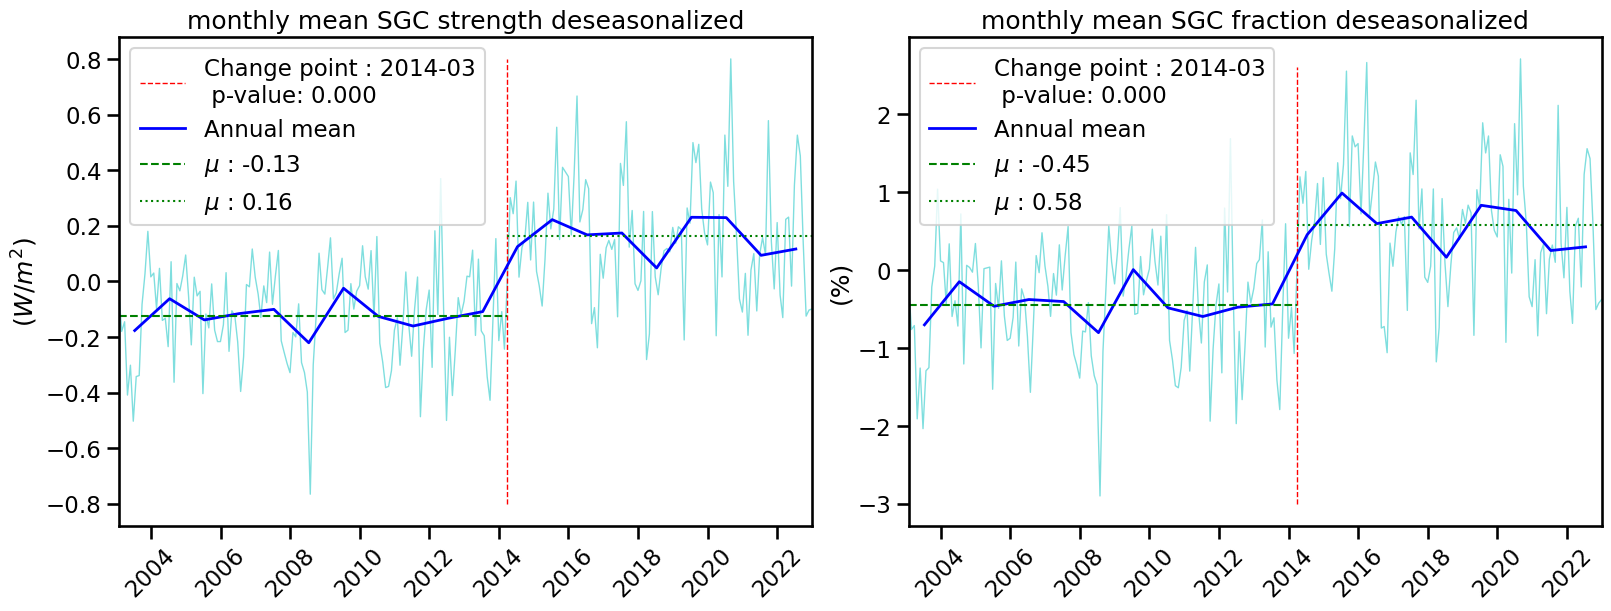

In [188]:
with sns.plotting_context("talk"):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6), sharex=True, sharey=False, constrained_layout=True)
    axes[0].plot(pd.to_datetime(str_clr_deseasonalized['time']), str_clr_deseasonalized, color='c',linewidth=1,alpha=0.5)
  
    str_clr_loc = pd.to_datetime(str_clr_deseasonalized['time'])[str_clr_hg.cp]
    axes[0].vlines(str_clr_loc, -0.8, 0.8, color='red', linewidth=1, linestyle='--', label='Change point : '+ str_clr_loc.strftime('%Y-%m') + f'\n p-value: {str_clr_hg.p:.3f}')

    ann = str_clr_deseasonalized.resample(time='Y', skipna=True).mean()
    ann_time = ann['time'] - pd.Timedelta(169, 'D')
    axes[0].plot(ann_time, ann, color='b', linewidth=2, label='Annual mean')

    mu1 = str_clr_hg.avg.mu1
    mu2 = str_clr_hg.avg.mu2
    axes[0].hlines(mu1, xmin=pd.to_datetime(str_clr_deseasonalized['time'])[0], xmax=str_clr_loc, linestyles='--', colors='green',lw=1.5, label='$\mu$ : ' + str(round(mu1,2)))
    axes[0].hlines(mu2, xmin=str_clr_loc, xmax=pd.to_datetime(str_clr_deseasonalized['time'])[-1], linestyles=':', colors='green', lw=1.5, label='$\mu$ : ' + str(round(mu2,2)))

    axes[0].set_title('monthly mean SGC strength deseasonalized')
    axes[0].set_ylabel('($W/m^2$)')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].legend()

    axes[1].plot(pd.to_datetime(frc_clr_deseasonalized['time']), frc_clr_deseasonalized, color='c',linewidth=1,alpha=0.5)
    frc_clr_loc = pd.to_datetime(frc_clr_deseasonalized['time'])[frc_clr_hg.cp]
    axes[1].vlines(frc_clr_loc, -3, 2.6, color='red', linewidth=1, linestyle='--', label='Change point : '+ frc_clr_loc.strftime('%Y-%m') + f'\n p-value: {frc_clr_hg.p:.3f}')

    ann = frc_clr_deseasonalized.resample(time='Y', skipna=True).mean()
    ann_time = ann['time'] - pd.Timedelta(169, 'D')
    axes[1].plot(ann_time, ann, color='b', linewidth=2, label='Annual mean')

    mu3 = frc_clr_hg.avg.mu1
    mu4 = frc_clr_hg.avg.mu2
    axes[1].hlines(mu3, xmin=pd.to_datetime(frc_clr_deseasonalized['time'])[0], xmax=frc_clr_loc, linestyles='--', colors='green', lw=1.5, label='$\mu$ : ' + str(round(mu3,2)))
    axes[1].hlines(mu4, xmin=frc_clr_loc, xmax=pd.to_datetime(frc_clr_deseasonalized['time'])[-1], linestyles=':', colors='green', lw=1.5, label='$\mu$ : ' + str(round(mu4,2)))

    axes[1].set_title('monthly mean SGC fraction deseasonalized')
    axes[1].set_ylabel('(%)')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].autoscale(enable=True, axis='x', tight=True)
    axes[1].legend()


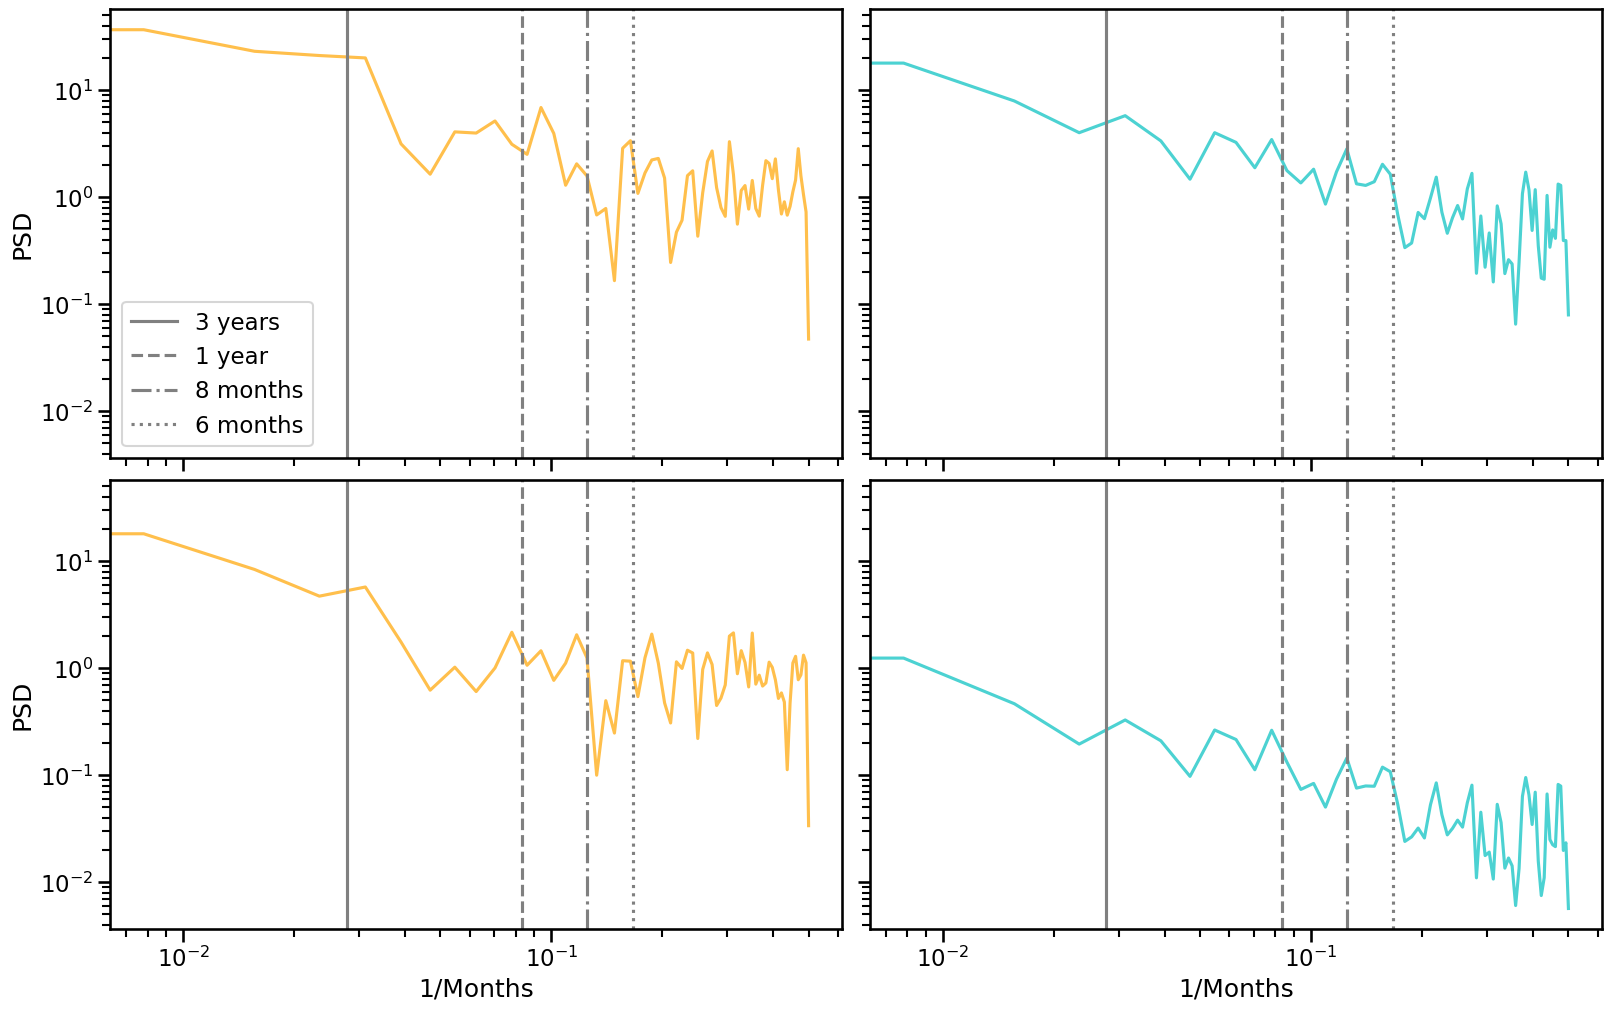

In [161]:
# Figure 1 analysis: power spectra of deseasonalized SGC strength and fraction time series:
import matplotlib.mlab as mlab


with sns.plotting_context("talk"):

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharex=True, sharey=True, constrained_layout=True)
    G_frc_all,f_frc_all = mlab.psd(frc_all_deseasonalized, detrend='none', NFFT=128, noverlap=64, Fs=1)
    axes[0,0].loglog(f_frc_all, G_frc_all, color='orange', alpha=0.7)
    axes[0,0].axvline(1/36, color='grey', label='3 years')
    axes[0,0].axvline(1/12, color='grey', linestyle='--', label='1 year')
    axes[0,0].axvline(1/8, color='grey', linestyle='-.', label='8 months')
    axes[0,0].axvline(1/6, color='grey', linestyle=':', label='6 months')
    axes[0,0].set_xlabel('')
    axes[0,0].set_ylabel('PSD')
    axes[0,0].legend()

    G_str_all,f_str_all = mlab.psd(str_all_deseasonalized, detrend='none', NFFT=128, noverlap=64, Fs=1)
    axes[1,0].loglog(f_str_all, G_str_all, color='orange', alpha=0.7)
    axes[1,0].axvline(1/36, color='grey', label='3 years')
    axes[1,0].axvline(1/12, color='grey', linestyle='--', label='1 year')
    axes[1,0].axvline(1/6, color='grey', linestyle=':', label='6 months')
    axes[1,0].axvline(1/8, color='grey', linestyle='-.', label='8 months')
    axes[1,0].set_xlabel('1/Months')
    axes[1,0].set_ylabel('PSD')

    G_frc_clr,f_frc_clr = mlab.psd(frc_clr_deseasonalized, detrend='none', NFFT=128, noverlap=64, Fs=1)
    axes[0,1].loglog(f_frc_clr, G_frc_clr, color='c', alpha=0.7)
    axes[0,1].axvline(1/36, color='grey', label='3 years')
    axes[0,1].axvline(1/12, color='grey', linestyle='--', label='1 year')
    axes[0,1].axvline(1/6, color='grey', linestyle=':', label='6 months')
    axes[0,1].axvline(1/8, color='grey', linestyle='-.', label='8 months')
    axes[0,1].set_xlabel('')
    axes[0,1].set_ylabel('')

    G_str_clr,f_str_clr = mlab.psd(str_clr_deseasonalized, detrend='none', NFFT=128, noverlap=64, Fs=1) 
    axes[1,1].loglog(f_str_clr, G_str_clr, color='c', alpha=0.7)
    axes[1,1].axvline(1/36, color='grey', label='3 years')
    axes[1,1].axvline(1/12, color='grey', linestyle='--', label='1 year')
    axes[1,1].axvline(1/6, color='grey', linestyle=':', label='6 months')
    axes[1,1].axvline(1/8, color='grey', linestyle='-.', label='8 months')
    axes[1,1].set_xlabel('1/Months')
    axes[1,1].set_ylabel('')

c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


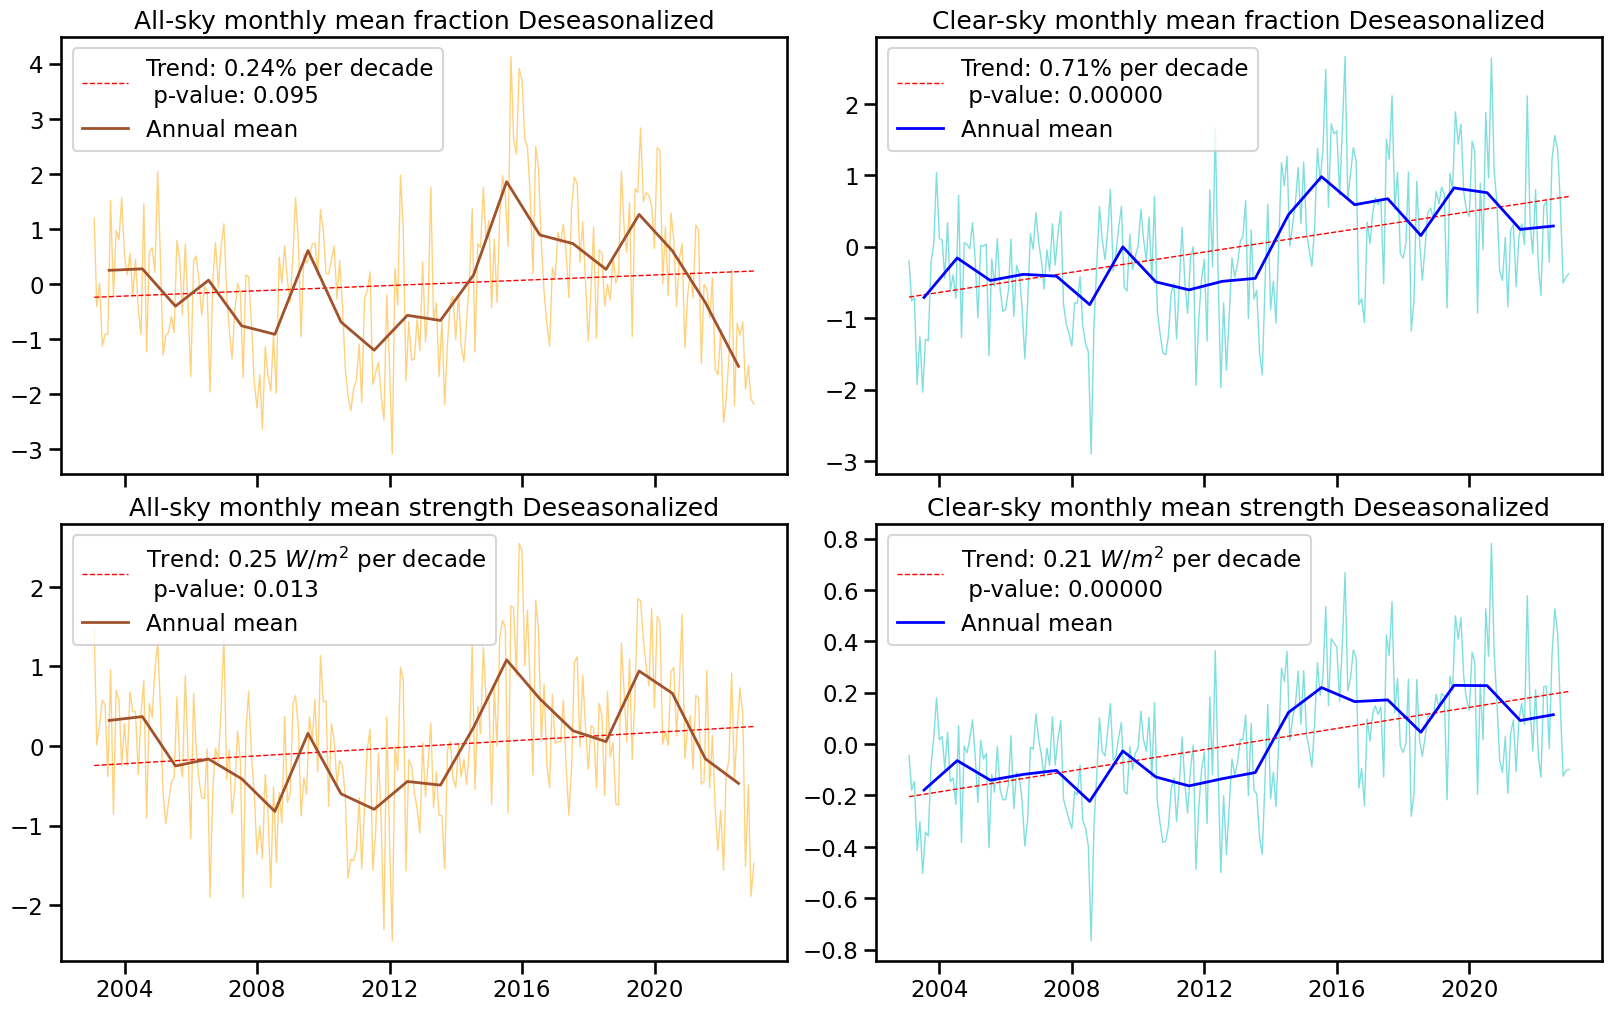

In [7]:
with sns.plotting_context("talk"):

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharex=True, sharey=False, constrained_layout=True)
    axes[0,0].plot(pd.to_datetime(frc_all_deseasonalized['time']), frc_all_deseasonalized, color='orange',linewidth=1,alpha=0.5)
    axes[0,0].plot(pd.to_datetime(frc_all_deseasonalized['time']), frc_all_lin.intercept + frc_all_lin.slope*t, color='red', linewidth=1, linestyle='--',
                   label=f'Trend: {frc_all_lin.slope*120:.2f}% per decade\n p-value: {frc_all_lin.pvalue:.3f}')
    ann = frc_all_deseasonalized.resample(time='Y', skipna=True).mean()
    ann_time = ann['time'] - pd.Timedelta(169, 'D')
    axes[0,0].plot(ann_time, ann, color='sienna', linewidth=2, label='Annual mean')
    axes[0,0].set_title('All-sky monthly mean fraction Deseasonalized')
    axes[0,0].legend()

    axes[0,1].plot(pd.to_datetime(frc_clr_deseasonalized['time']), frc_clr_deseasonalized, color='c',linewidth=1,alpha=0.5)
    axes[0,1].plot(pd.to_datetime(frc_clr_deseasonalized['time']), frc_clr_lin.intercept + frc_clr_lin.slope*t, color='red', linewidth=1, linestyle='--',
                   label=f'Trend: {frc_clr_lin.slope*120:.2f}% per decade\n p-value: {frc_clr_lin.pvalue:.5f}')
    ann = frc_clr_deseasonalized.resample(time='Y', skipna=True).mean()
    ann_time = ann['time'] - pd.Timedelta(169, 'D')
    axes[0,1].plot(ann_time, ann, color='b', linewidth=2, label='Annual mean')
    axes[0,1].set_title('Clear-sky monthly mean fraction Deseasonalized')
    axes[0,1].legend()

    axes[1,0].plot(pd.to_datetime(str_all_deseasonalized['time']), str_all_deseasonalized, color='orange',linewidth=1,alpha=0.5)
    axes[1,0].plot(pd.to_datetime(str_all_deseasonalized['time']), str_all_lin.intercept + str_all_lin.slope*t, color='red', linewidth=1, linestyle='--',
                   label=f'Trend: {str_all_lin.slope*120:.2f} $W/m^2$ per decade\n p-value: {str_all_lin.pvalue:.3f}')
    ann = str_all_deseasonalized.resample(time='Y', skipna=True).mean()
    ann_time = ann['time'] - pd.Timedelta(169, 'D')
    axes[1,0].plot(ann_time, ann, color='sienna', linewidth=2, label='Annual mean')
    axes[1,0].set_title('All-sky monthly mean strength Deseasonalized')
    axes[1,0].legend()

    axes[1,1].plot(pd.to_datetime(str_clr_deseasonalized['time']), str_clr_deseasonalized, color='c',linewidth=1,alpha=0.5)
    axes[1,1].plot(pd.to_datetime(str_clr_deseasonalized['time']), str_clr_lin.intercept + str_clr_lin.slope*t, color='red', linewidth=1, linestyle='--',
                   label=f'Trend: {str_clr_lin.slope*120:.2f} $W/m^2$ per decade\n p-value: {str_clr_lin.pvalue:.5f}')
    ann = str_clr_deseasonalized.resample(time='Y', skipna=True).mean()
    ann_time = ann['time'] - pd.Timedelta(169, 'D')
    axes[1,1].plot(ann_time, ann, color='b', linewidth=2, label='Annual mean')
    axes[1,1].set_title('Clear-sky monthly mean strength Deseasonalized')
    axes[1,1].legend()


In [86]:
# Calculate fraction of measured area in SGC, for each hemisphere seperately:

#calculate fraction of tropics area in SGE (ocean area between 35N/S)
mask = xr.open_dataset('../CERES data/CERES_SSF1deg-Day_Aqua-MODIS_Ed4.1_Subset_20210312-20210331.nc')['aux_ocean_daily'][0,:,:]
landmask = mask.where(mask==100,0)/100
xlon, ylat = np.meshgrid(SGE_ts.SGE_str_all.lon, SGE_ts.SGE_str_all.lat)
R = earth_radius(ylat)
dlat = np.deg2rad(np.gradient(ylat, axis=0))
dlon = np.deg2rad(np.gradient(xlon, axis=1))
dy = dlat * R
dx = dlon * R * np.cos(np.deg2rad(ylat))
area_grid = dy * dx * landmask.sel(lat=ylat[:,0])

SGE_area_all = SGE_ts.SGE_occ_all*area_grid
SGE_area_clr = SGE_ts.SGE_occ_clr*area_grid

clr_area_NH = (SGE_ts.clr_flag*area_grid).sel(lat=slice(0,35)).sum(dim=['lat','lon']) #total clear-sky measured area in NH
clr_area_SH = (SGE_ts.clr_flag*area_grid).sel(lat=slice(-35,0)).sum(dim=['lat','lon'])
all_area_NH = (SGE_ts.all_flag*area_grid).sel(lat=slice(0,35)).sum(dim=['lat','lon'])
all_area_SH = (SGE_ts.all_flag*area_grid).sel(lat=slice(-35,0)).sum(dim=['lat','lon'])

SGE_frac_clr2_NH = (SGE_area_clr.sel(lat=slice(0,35)).sum(dim=['lat','lon'])/clr_area_NH)*100 #total clear-sky SGC area in NH / total measured area in NH
SGE_frac_clr2_SH = (SGE_area_clr.sel(lat=slice(-35,0)).sum(dim=['lat','lon'])/clr_area_SH)*100
SGE_frac_all2_NH = (SGE_area_all.sel(lat=slice(0,35)).sum(dim=['lat','lon'])/all_area_NH)*100 #total all-sky SGC area in NH / total measured area in NH
SGE_frac_all2_SH = (SGE_area_all.sel(lat=slice(-35,0)).sum(dim=['lat','lon'])/all_area_SH)*100

#clean up all-sky fraction:
SGE_frac_all2_NH = SGE_frac_all2_NH.where(SGE_ts['airs_flag']==0) #remove days without AIRS measurements from all-sky data (79 days total)
SGE_frac_all2_SH = SGE_frac_all2_SH.where(SGE_ts['airs_flag']==0)

#take monthly means:
SGE_frac_clr2_NH_mm = SGE_frac_clr2_NH.resample(time='M', skipna=True).mean()
SGE_frac_clr2_SH_mm = SGE_frac_clr2_SH.resample(time='M', skipna=True).mean()
SGE_frac_all2_NH_mm = SGE_frac_all2_NH.resample(time='M', skipna=True).mean()
SGE_frac_all2_SH_mm = SGE_frac_all2_SH.resample(time='M', skipna=True).mean()

#same for strength:
SGE_str_clr_NH_mm = lat_weighted_mean(SGE_ts.SGE_str_clr.sel(lat=slice(0,35))).resample(time='M', skipna=True).mean()
SGE_str_clr_SH_mm = lat_weighted_mean(SGE_ts.SGE_str_clr.sel(lat=slice(-35,0))).resample(time='M', skipna=True).mean()
SGE_str_all_NH_mm = lat_weighted_mean(SGE_ts.SGE_str_all.sel(lat=slice(0,35))).resample(time='M', skipna=True).mean()
SGE_str_all_SH_mm = lat_weighted_mean(SGE_ts.SGE_str_all.sel(lat=slice(-35,0))).resample(time='M', skipna=True).mean()

c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning:

c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


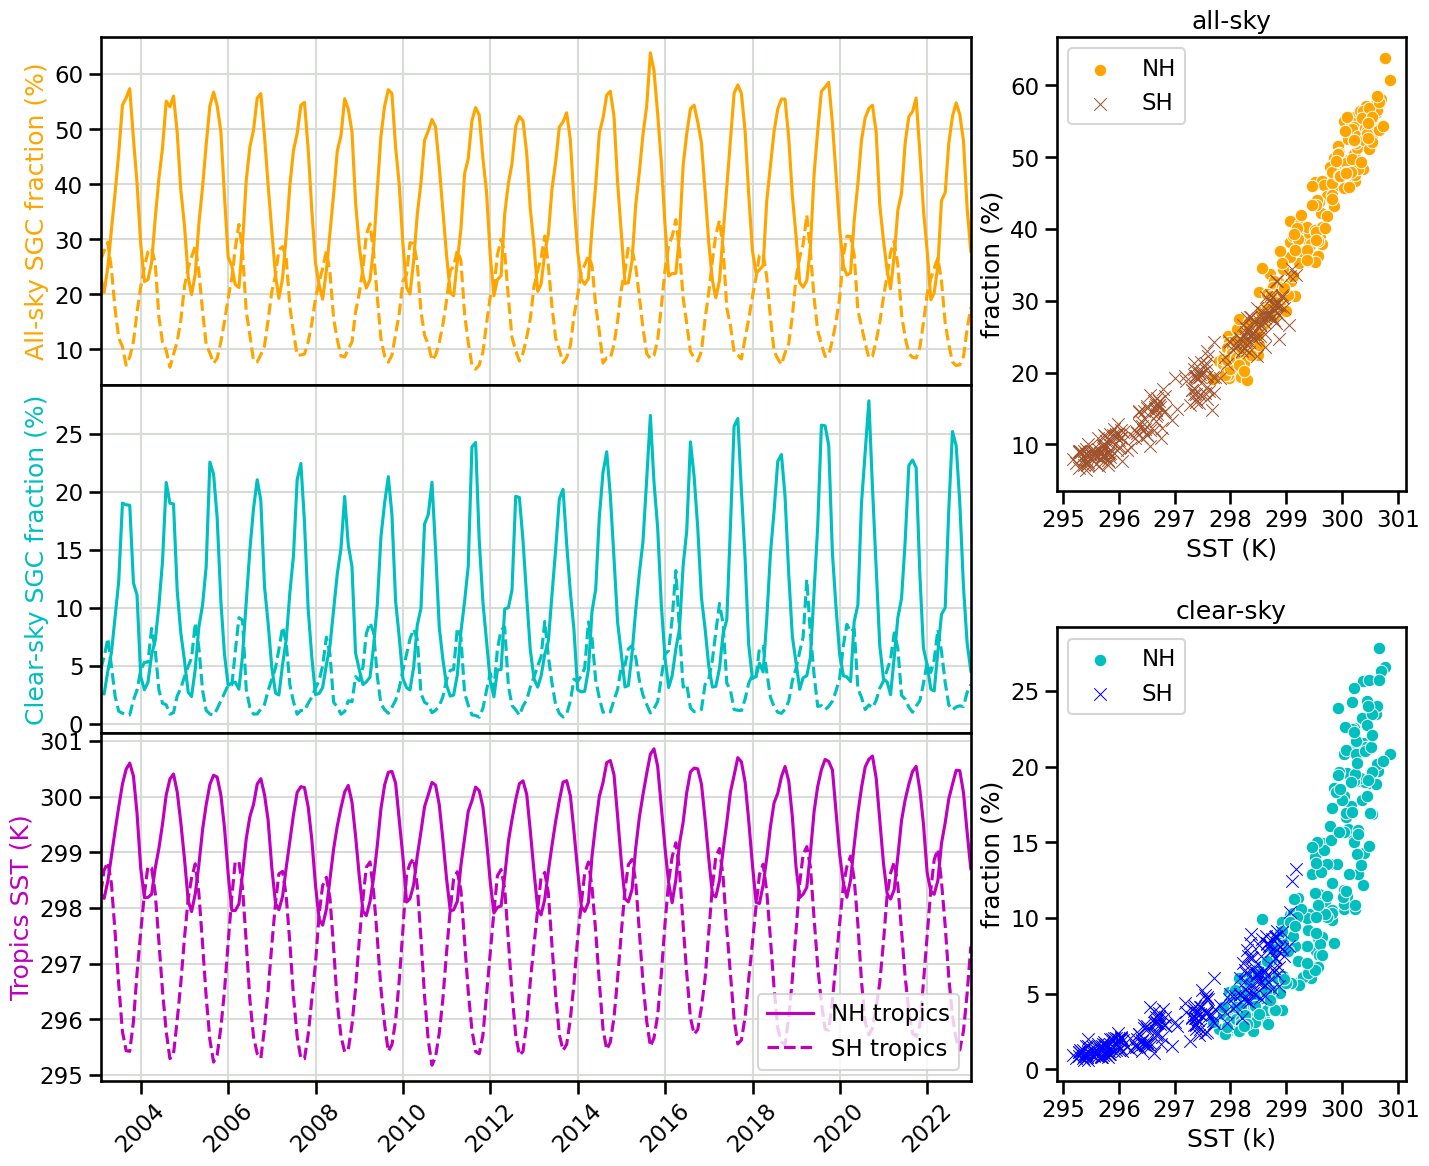

In [89]:
# Figure 2, time-series of SGC fraction with tropical SSTs with  correlation column:
import matplotlib.ticker as ticker

sst_mm = lat_weighted_mean(SGE_ts.sst).resample(time='M', skipna=True).mean().sel(time=slice('2003', '2022')) 
sst_SH_mm = lat_weighted_mean(SGE_ts.sst.sel(lat=slice(-35,0))).resample(time='M', skipna=True).mean().sel(time=slice('2003', '2022')) 
sst_NH_mm = lat_weighted_mean(SGE_ts.sst.sel(lat=slice(0,35))).resample(time='M', skipna=True).mean().sel(time=slice('2003', '2022'))


d1 = {'frc_clr_NH': SGE_frac_clr2_NH_mm, 'frc_clr_SH': SGE_frac_clr2_SH_mm, 'frc_all_NH': SGE_frac_all2_NH_mm, 'frc_all_SH': SGE_frac_all2_SH_mm, 'sst_NH_mm': sst_NH_mm,
       'sst_SH_mm': sst_SH_mm, 'time_all': frc_all_mm['time'], 'time_clr': frc_clr_mm['time']}
df_scatterplt = pd.DataFrame(data=d1)

with plt.rc_context({'axes.autolimit_mode': 'round_numbers'}) and sns.plotting_context('talk'):
    fig = plt.figure(figsize=(15,12))
    gs_left = gridspec.GridSpec(ncols=3, nrows=3, hspace = 0.0, wspace = 0.0)
    gs_right = gridspec.GridSpec(ncols=3, nrows=2, hspace=0.3, wspace=0.37)
    fig.subplots_adjust(left=0.08, right=0.95, bottom=0.08, top=0.95)

    ax1 = fig.add_subplot(gs_left[0,0:2])
    ax1.plot(SGE_frac_all2_NH_mm['time'], SGE_frac_all2_NH_mm, color='orange', label='NH')
    ax1.plot(SGE_frac_all2_NH_mm['time'], SGE_frac_all2_SH_mm, linestyle='--', color='orange', label='SH')
    ax1.grid(color='xkcd:light grey')
    #ax2 = ax1.twinx()
    #ax2.plot(sst_SH_mm['time'], sst_SH_mm, color='orange',linestyle='--')
    #ax2.plot(sst_NH_mm['time'], sst_NH_mm, color='orange')
    #ax2.plot(sst_al_mm['time'], sst_al_mm-sst_al_mm.mean(), color='red')
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_ylabel('All-sky SGC fraction (%)', color='orange')
    #ax2.set_ylabel('Tropics SST (K)', color='orange')
    ax1.autoscale(enable=True, axis='x', tight=True)
    plt.setp(ax1.get_xticklabels(), visible=False)
    #plt.legend(['SH tropics','NH tropics'])

    ax4 = fig.add_subplot(gs_left[1,0:2])
    ax4.plot(SGE_frac_clr2_NH_mm['time'], SGE_frac_clr2_NH_mm, color='c', label='NH')
    ax4.plot(SGE_frac_clr2_SH_mm['time'], SGE_frac_clr2_SH_mm, linestyle='--', color='c', label='SH')
    ax4.grid(color='xkcd:light grey')
    #ax5 = ax4.twinx()
    #ax5.plot(sst_SH_mm['time'], sst_SH_mm, color='c',linestyle='--')
    #ax5.plot(sst_NH_mm['time'], sst_NH_mm, color='c')
    #ax2.plot(sst_al_mm['time'], sst_al_mm-sst_al_mm.mean(), color='red')
    ax4.tick_params(axis='x', rotation=45)
    ax4.set_ylabel('Clear-sky SGC fraction (%)', color='c')
    #ax5.set_ylabel('Tropics SST (K)', color='c')
    ax4.autoscale(enable=True, axis='x', tight=True)
    plt.setp(ax4.get_xticklabels(), visible=False)
    #plt.legend(['SH tropics','NH tropics'])

    ax7 = fig.add_subplot(gs_left[2,0:2])
    ax7.plot(sst_NH_mm['time'], sst_NH_mm, color='m')
    ax7.plot(sst_SH_mm['time'], sst_SH_mm, color='m',linestyle='--')
    ax7.set_ylabel('Tropics SST (K)', color='m')
    ax7.tick_params(axis='x', rotation=45)
    ax7.grid(color='xkcd:light grey')
    ax7.autoscale(enable=True, axis='x', tight=True)
    plt.legend(['NH tropics','SH tropics'])

    ax3 = fig.add_subplot(gs_right[0,2])
    sns.scatterplot(ax=ax3,data=df_scatterplt,y='frc_all_NH',x='sst_NH_mm',color='orange',label='NH')
    sns.scatterplot(ax=ax3,data=df_scatterplt,y='frc_all_SH',x='sst_SH_mm',color='sienna',marker='x',label='SH')
    ax3.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.legend(loc='upper left')
    #plt.setp(ax3.get_yticklabels(), visible=False)
    plt.ylabel('fraction (%)')
    plt.xlabel('SST (K)')
    plt.title('all-sky')

    ax6 = fig.add_subplot(gs_right[1,2])
    sns.scatterplot(ax=ax6,data=df_scatterplt,y='frc_clr_NH',x='sst_NH_mm',color='c',label='NH')
    sns.scatterplot(ax=ax6,data=df_scatterplt,y='frc_clr_SH',x='sst_SH_mm',color='blue',marker='x',label='SH')
    ax6.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.legend(loc='upper left')
    #plt.setp(ax6.get_yticklabels(), visible=False)
    plt.ylabel('fraction (%)')
    plt.xlabel('SST (k)')
    plt.title('clear-sky')






In [6]:
def fit_logx(x,y, grid=None):
    # modified from what seaborn uses to fit log model (to get parameters for labels)
    if grid is None:
        grid = np.linspace(x.min(), x.max(), 100)

    """Fit the model in log-space."""
    X, y = np.c_[np.ones(len(x)), x], y
    grid = np.c_[np.ones(len(grid)), np.log(grid)]

    def reg_func(_x, _y):
        _x = np.c_[_x[:, 0], np.log(_x[:, 1])]
        return np.linalg.pinv(_x).dot(_y)

    yhat = grid.dot(reg_func(X, y))
    grid = np.linspace(x.min(), x.max(), 100)
    return grid, yhat

In [87]:

def fit_exponential(x, y, grid=None):
    """Fit an exponential model y = a * exp(b * x) using linear regression in log(y)."""

    mask = y > 0
    x = x[mask]
    y = y[mask]

    if grid is None:
        grid = np.linspace(x.min(), x.max(), 100)

    # Take the log of y to make it linear: log(y) = log(a) + b*x
    logy = np.log(y)

    # Linear regression to find coefficients
    X = np.c_[np.ones(len(x)), x]
    beta = np.linalg.pinv(X).dot(logy)

    intercept, slope = beta
    a = np.exp(intercept)
    b = slope

    # Predict
    yhat = a * np.exp(b * grid)

    return grid, yhat, (a, b)


In [149]:
# bootstrap exponential fit for strength/fraction vs SST:
sst_mm = lat_weighted_mean(SGE_ts.sst).resample(time='M', skipna=True).mean().sel(time=slice('2003', '2022')) 
sst_SH_mm = lat_weighted_mean(SGE_ts.sst.sel(lat=slice(-35,0))).resample(time='M', skipna=True).mean().sel(time=slice('2003', '2022')) 
sst_NH_mm = lat_weighted_mean(SGE_ts.sst.sel(lat=slice(0,35))).resample(time='M', skipna=True).mean().sel(time=slice('2003', '2022')) 

d1 = {'frc_clr_NH': SGE_frac_clr2_NH_mm, 'frc_clr_SH': SGE_frac_clr2_SH_mm, 'frc_all_NH': SGE_frac_all2_NH_mm, 'frc_all_SH': SGE_frac_all2_SH_mm, 'sst_NH_mm': sst_NH_mm, 
      'sst_SH_mm': sst_SH_mm, 'time_all': frc_all_mm['time'], 'time_clr': frc_clr_mm['time'], 'str_clr_NH':SGE_str_clr_NH_mm, 'str_clr_SH': SGE_str_clr_SH_mm,
       'str_all_NH': SGE_str_all_NH_mm, 'str_all_SH':SGE_str_all_SH_mm}
df_scatterplt = pd.DataFrame(data=d1)

n_boot = 500

def bootstrap_exponential_fit(x, y, n_boot):
    boot_params = []
    for _ in range(n_boot):
        indices = np.random.choice(len(x), len(x), replace=True)
        x_sample = x[indices]
        y_sample = y[indices]
        _, _, params = fit_exponential(x_sample, y_sample)
        boot_params.append(params)
    return np.array(boot_params)

sst_array = pd.concat([df_scatterplt['sst_NH_mm'],df_scatterplt['sst_SH_mm']]).reset_index(drop=True)

frc_all_boot_params = bootstrap_exponential_fit(sst_array, pd.concat([df_scatterplt['frc_all_NH'],df_scatterplt['frc_all_SH']]).reset_index(drop=True), n_boot=n_boot)
frc_clr_boot_params = bootstrap_exponential_fit(sst_array, pd.concat([df_scatterplt['frc_clr_NH'],df_scatterplt['frc_clr_SH']]).reset_index(drop=True), n_boot=n_boot)
str_all_boot_params = bootstrap_exponential_fit(sst_array, pd.concat([df_scatterplt['str_all_NH'],df_scatterplt['str_all_SH']]).reset_index(drop=True), n_boot=n_boot)
str_clr_boot_params = bootstrap_exponential_fit(sst_array, pd.concat([df_scatterplt['str_clr_NH'],df_scatterplt['str_clr_SH']]).reset_index(drop=True), n_boot=n_boot)

frc_all_pdf = norm.fit(frc_all_boot_params[:,1])
frc_all_ci = norm.interval(0.95, loc=frc_all_pdf[0], scale=frc_all_pdf[1])

frc_clr_pdf = norm.fit(frc_clr_boot_params[:,1])
frc_clr_ci = norm.interval(0.95, loc=frc_clr_pdf[0], scale=frc_clr_pdf[1])

str_all_pdf = norm.fit(str_all_boot_params[:,1])
str_all_ci = norm.interval(0.95, loc=str_all_pdf[0], scale=str_all_pdf[1])

str_clr_pdf = norm.fit(str_clr_boot_params[:,1])
str_clr_ci = norm.interval(0.95, loc=str_clr_pdf[0], scale=str_clr_pdf[1])

c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


<>:57: SyntaxWarning: invalid escape sequence '\p'
<>:73: SyntaxWarning: invalid escape sequence '\p'
<>:89: SyntaxWarning: invalid escape sequence '\p'
<>:105: SyntaxWarning: invalid escape sequence '\p'
<>:57: SyntaxWarning: invalid escape sequence '\p'
<>:73: SyntaxWarning: invalid escape sequence '\p'
<>:89: SyntaxWarning: invalid escape sequence '\p'
<>:105: SyntaxWarning: invalid escape sequence '\p'
C:\Users\made2928\AppData\Local\Temp\ipykernel_31684\1302381407.py:57: SyntaxWarning: invalid escape sequence '\p'
  ax3.plot(grid_all_frc,yhat_all_frc,color='gold', label=f'b={frc_all_pdf[0]:.2f} $\pm$ {frc_all_ci[1]-frc_all_ci[0]:.3f}')
C:\Users\made2928\AppData\Local\Temp\ipykernel_31684\1302381407.py:73: SyntaxWarning: invalid escape sequence '\p'
  ax6.plot(grid_clr_frc,yhat_clr_frc,color='deepskyblue', label=f'b={frc_clr_pdf[0]:.3f} $\pm$ {frc_clr_ci[1]-frc_clr_ci[0]:.3f}')
C:\Users\made2928\AppData\Local\Temp\ipykernel_31684\1302381407.py:89: SyntaxWarning: invalid escape sequ

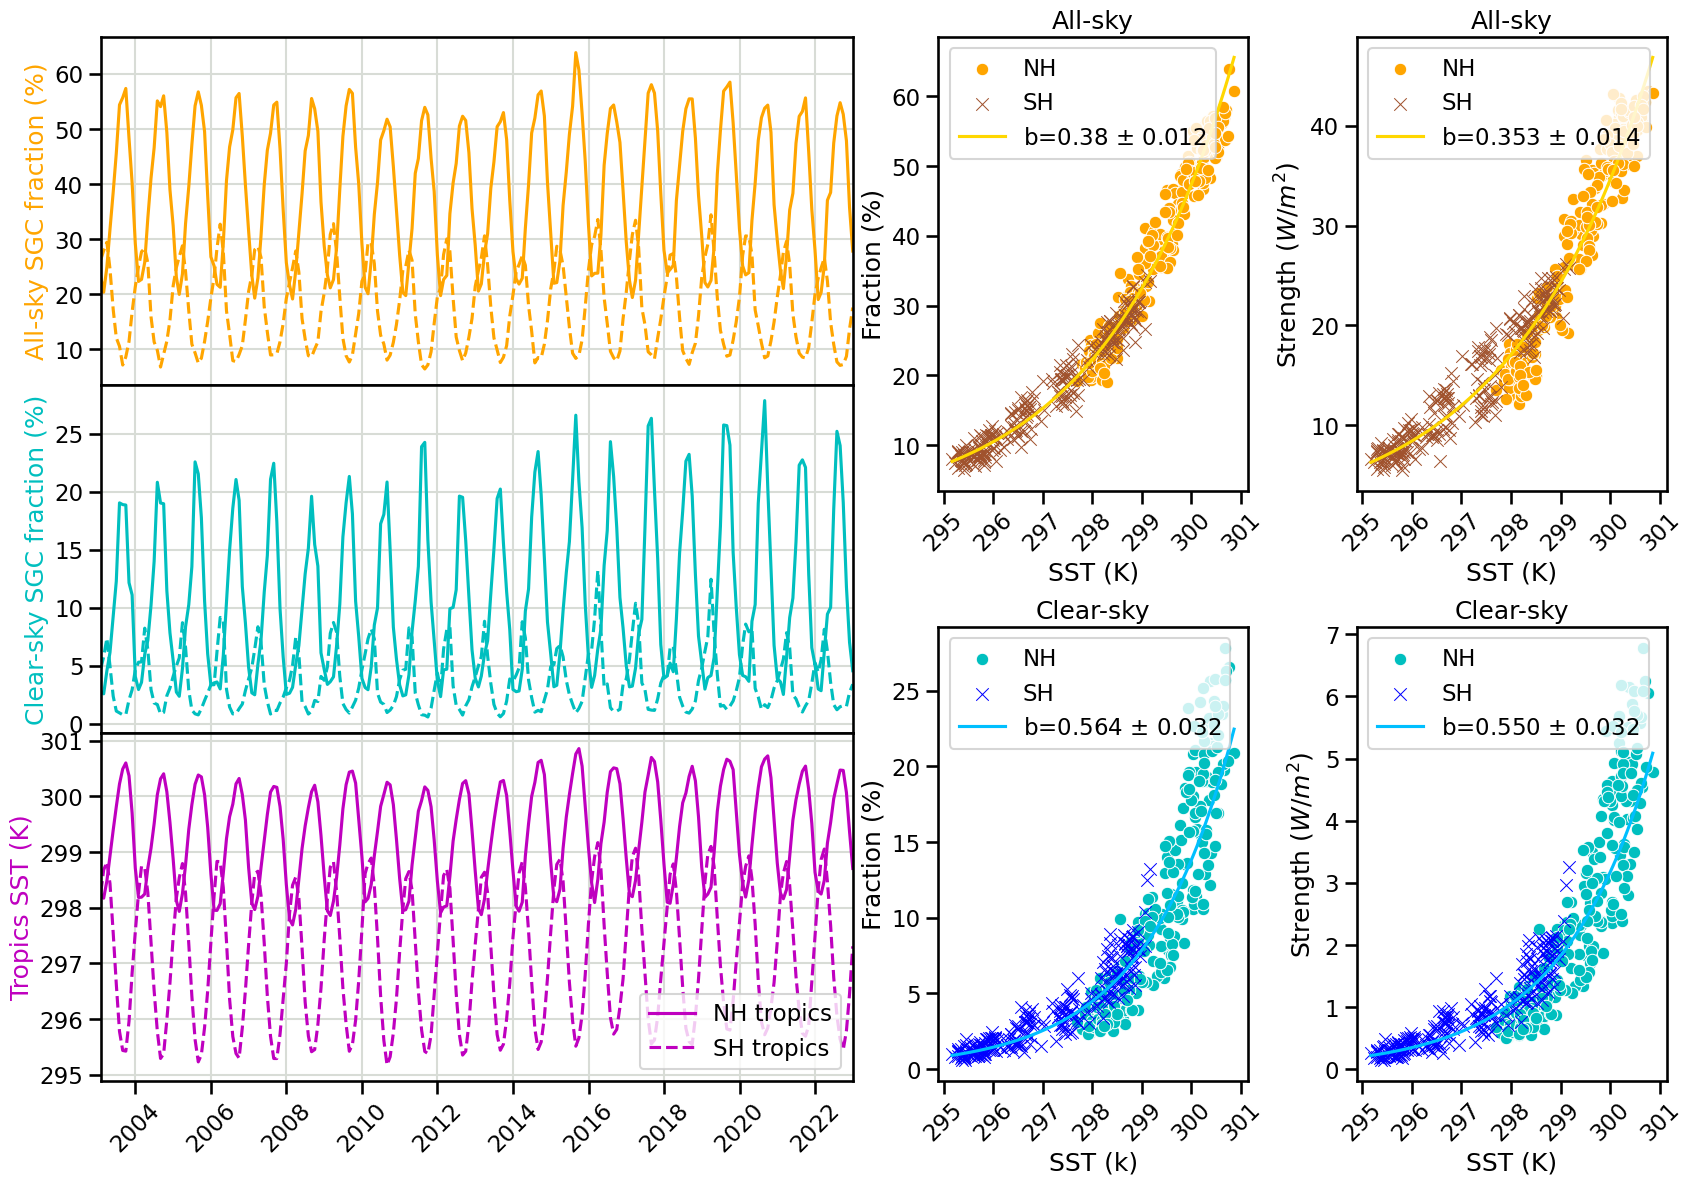

In [169]:
# Figure 2, time-series of SGC fraction with tropical SSTs v2 with fraction and strength vs SST:
import matplotlib.ticker as ticker

with plt.rc_context({'axes.autolimit_mode': 'round_numbers'}) and sns.plotting_context('talk'):
    fig = plt.figure(figsize=(18,12))
    gs_left = gridspec.GridSpec(ncols=4, nrows=3, hspace = 0.0, wspace = 0.18)
    gs_right = gridspec.GridSpec(ncols=4, nrows=2, hspace=0.3, wspace=0.35)
    fig.subplots_adjust(left=0.08, right=0.95, bottom=0.08, top=0.95)

    ax1 = fig.add_subplot(gs_left[0,0:2])
    ax1.plot(SGE_frac_all2_NH_mm['time'], SGE_frac_all2_NH_mm, color='orange', label='NH')
    ax1.plot(SGE_frac_all2_NH_mm['time'], SGE_frac_all2_SH_mm, linestyle='--', color='orange', label='SH')
    ax1.grid(color='xkcd:light grey')
    #ax2 = ax1.twinx()
    #ax2.plot(sst_SH_mm['time'], sst_SH_mm, color='orange',linestyle='--')
    #ax2.plot(sst_NH_mm['time'], sst_NH_mm, color='orange')
    #ax2.plot(sst_al_mm['time'], sst_al_mm-sst_al_mm.mean(), color='red')
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_ylabel('All-sky SGC fraction (%)', color='orange')
    #ax2.set_ylabel('Tropics SST (K)', color='orange')
    ax1.autoscale(enable=True, axis='x', tight=True)
    plt.setp(ax1.get_xticklabels(), visible=False)
    #plt.legend(['SH tropics','NH tropics'])

    ax4 = fig.add_subplot(gs_left[1,0:2])
    ax4.plot(SGE_frac_clr2_NH_mm['time'], SGE_frac_clr2_NH_mm, color='c', label='NH')
    ax4.plot(SGE_frac_clr2_SH_mm['time'], SGE_frac_clr2_SH_mm, linestyle='--', color='c', label='SH')
    ax4.grid(color='xkcd:light grey')
    #ax5 = ax4.twinx()
    #ax5.plot(sst_SH_mm['time'], sst_SH_mm, color='c',linestyle='--')
    #ax5.plot(sst_NH_mm['time'], sst_NH_mm, color='c')
    #ax2.plot(sst_al_mm['time'], sst_al_mm-sst_al_mm.mean(), color='red')
    ax4.tick_params(axis='x', rotation=45)
    ax4.set_ylabel('Clear-sky SGC fraction (%)', color='c')
    #ax5.set_ylabel('Tropics SST (K)', color='c')
    ax4.autoscale(enable=True, axis='x', tight=True)
    plt.setp(ax4.get_xticklabels(), visible=False)
    #plt.legend(['SH tropics','NH tropics'])

    ax7 = fig.add_subplot(gs_left[2,0:2])
    ax7.plot(sst_NH_mm['time'], sst_NH_mm, color='m')
    ax7.plot(sst_SH_mm['time'], sst_SH_mm, color='m',linestyle='--')
    ax7.set_ylabel('Tropics SST (K)', color='m')
    ax7.tick_params(axis='x', rotation=45)
    ax7.grid(color='xkcd:light grey')
    ax7.autoscale(enable=True, axis='x', tight=True)
    plt.legend(['NH tropics','SH tropics'])

    ax3 = fig.add_subplot(gs_right[0,2])
    #grid_allNH, yhat_allNH, (a_allNH, b_allNH) = fit_exponential(df_scatterplt['sst_NH_mm'],df_scatterplt['frc_all_NH'])
    #grid_allSH, yhat_allSH, (a_allSH, b_allSH) = fit_exponential(df_scatterplt['sst_SH_mm'],df_scatterplt['frc_all_SH'])
    grid_all_frc, yhat_all_frc, (a_all_frc, b_all_frc) = fit_exponential(pd.concat([df_scatterplt['sst_NH_mm'],df_scatterplt['sst_SH_mm']]),pd.concat([df_scatterplt['frc_all_NH'],df_scatterplt['frc_all_SH']]))
    sns.scatterplot(ax=ax3,data=df_scatterplt,y='frc_all_NH',x='sst_NH_mm',color='orange',label=f'NH')
    sns.scatterplot(ax=ax3,data=df_scatterplt,y='frc_all_SH',x='sst_SH_mm',color='sienna',marker='x',label=f'SH')
    #ax3.plot(grid_allNH,yhat_allNH,color='orange')
    #ax3.plot(grid_allSH,yhat_allSH,color='sienna')
    ax3.plot(grid_all_frc,yhat_all_frc,color='gold', label=f'b={frc_all_pdf[0]:.2f} $\pm$ {frc_all_ci[1]-frc_all_ci[0]:.3f}')
    ax3.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax3.tick_params(axis='x', rotation=45)
    plt.legend(loc='upper left')
    plt.ylabel('Fraction (%)')
    plt.xlabel('SST (K)')
    plt.title('All-sky')

    ax6 = fig.add_subplot(gs_right[1,2])
    #grid_clrNH, yhat_clrNH, (a_clrNH, b_clrNH) = fit_exponential(df_scatterplt['sst_NH_mm'],df_scatterplt['frc_clr_NH'])
    #grid_clrSH, yhat_clrSH, (a_clrSH, b_clrSH) = fit_exponential(df_scatterplt['sst_SH_mm'],df_scatterplt['frc_clr_SH'])
    grid_clr_frc, yhat_clr_frc, (a_clr_frc, b_clr_frc) = fit_exponential(pd.concat([df_scatterplt['sst_NH_mm'],df_scatterplt['sst_SH_mm']]),pd.concat([df_scatterplt['frc_clr_NH'],df_scatterplt['frc_clr_SH']]))
    sns.scatterplot(ax=ax6,data=df_scatterplt,y='frc_clr_NH',x='sst_NH_mm',color='c',label=f'NH')
    sns.scatterplot(ax=ax6,data=df_scatterplt,y='frc_clr_SH',x='sst_SH_mm',color='blue',marker='x',label=f'SH')
    #ax6.plot(grid_clrNH,yhat_clrNH,color='c')
    #ax6.plot(grid_clrSH,yhat_clrSH,color='blue')
    ax6.plot(grid_clr_frc,yhat_clr_frc,color='deepskyblue', label=f'b={frc_clr_pdf[0]:.3f} $\pm$ {frc_clr_ci[1]-frc_clr_ci[0]:.3f}')
    ax6.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax6.tick_params(axis='x', rotation=45)
    plt.legend(loc='upper left')
    plt.ylabel('Fraction (%)')
    plt.xlabel('SST (k)')
    plt.title('Clear-sky')

    ax8 = fig.add_subplot(gs_right[0,3])
    #grid_allNH, yhat_allNH, (a_allNH, b_allNH) = fit_exponential(df_scatterplt['sst_NH_mm'],df_scatterplt['str_all_NH'])
    #grid_allSH, yhat_allSH, (a_allSH, b_allSH) = fit_exponential(df_scatterplt['sst_SH_mm'],df_scatterplt['str_all_SH'])
    grid_all_str, yhat_all_str, (a_all_str, b_all_str) = fit_exponential(pd.concat([df_scatterplt['sst_NH_mm'],df_scatterplt['sst_SH_mm']]),pd.concat([df_scatterplt['str_all_NH'],df_scatterplt['str_all_SH']]))
    sns.scatterplot(ax=ax8,data=df_scatterplt,y='str_all_NH',x='sst_NH_mm',color='orange',label=f'NH')
    sns.scatterplot(ax=ax8,data=df_scatterplt,y='str_all_SH',x='sst_SH_mm',color='sienna',marker='x',label=f'SH')
    #ax8.plot(grid_allNH,yhat_allNH,color='orange')
    #ax8.plot(grid_allSH,yhat_allSH,color='sienna')
    ax8.plot(grid_all_str,yhat_all_str,color='gold', label=f'b={str_all_pdf[0]:.3f} $\pm$ {str_all_ci[1]-str_all_ci[0]:.3f}')
    ax8.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax8.tick_params(axis='x', rotation=45)
    plt.legend(loc='upper left')
    plt.ylabel('Strength ($W/m^2$)')
    plt.xlabel('SST (K)')
    plt.title('All-sky')

    ax9 = fig.add_subplot(gs_right[1,3])
    #grid_clrNH, yhat_clrNH, (a_clrNH, b_clrNH) = fit_exponential(df_scatterplt['sst_NH_mm'],df_scatterplt['str_clr_NH'])
    #grid_clrSH, yhat_clrSH, (a_clrSH, b_clrSH) = fit_exponential(df_scatterplt['sst_SH_mm'],df_scatterplt['str_clr_SH'])
    grid_clr_str, yhat_clr_str, (a_clr_str, b_clr_str) = fit_exponential(pd.concat([df_scatterplt['sst_NH_mm'],df_scatterplt['sst_SH_mm']]),pd.concat([df_scatterplt['str_clr_NH'],df_scatterplt['str_clr_SH']]))
    sns.scatterplot(ax=ax9,data=df_scatterplt,y='str_clr_NH',x='sst_NH_mm',color='c',label=f'NH')
    sns.scatterplot(ax=ax9,data=df_scatterplt,y='str_clr_SH',x='sst_SH_mm',color='blue',marker='x',label=f'SH')
    #ax9.plot(grid_clrNH,yhat_clrNH,color='c')
    #ax9.plot(grid_clrSH,yhat_clrSH,color='blue')
    ax9.plot(grid_clr_str,yhat_clr_str,color='deepskyblue', label=f'b={str_clr_pdf[0]:.3f} $\pm$ {str_clr_ci[1]-str_clr_ci[0]:.3f}')
    ax9.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax9.tick_params(axis='x', rotation=45)
    plt.legend(loc='upper left')
    plt.ylabel('Strength ($W/m^2$)')
    plt.xlabel('SST (K)')
    plt.title('Clear-sky')

    plt.savefig('../../Figure2_SGC_fraction_strength_expfit.png', dpi=300)


In [9]:
#Figure 3: Annual cycles with monthly means

df_pwALLmm = str_all_clean.resample(time='M', skipna=True).mean().to_dataframe()
df_pwALLmm['year'] = df_pwALLmm.index.year
df_pwALLmm['month'] = df_pwALLmm.index.month
df_frALLmm = frc_all_clean.resample(time='M', skipna=True).mean().to_dataframe()
sst_clr = lat_weighted_mean(SGE_ts.sst.where(SGE_ts.SGE_occ_clr)).resample(time='M', skipna=True).mean().sel(time=slice('2003', '2022')).to_dataframe()
df_ALLmm = pd.concat([df_pwALLmm, df_frALLmm, sst_clr], axis=1)

df_pwCLRmm = str_clr.resample(time='M', skipna=True).mean().to_dataframe()
df_pwCLRmm['year'] = df_pwCLRmm.index.year
df_pwCLRmm['month'] = df_pwCLRmm.index.month
df_frCLRmm = frc_clr_clean.resample(time='M', skipna=True).mean().to_dataframe()
sst_all = lat_weighted_mean(SGE_ts.sst.where(SGE_ts.SGE_occ_all)).resample(time='M', skipna=True).mean().sel(time=slice('2003', '2022')).to_dataframe()
df_CLRmm = pd.concat([df_pwCLRmm, df_frCLRmm, sst_all], axis=1)

Text(0, 0.5, 'cler-sky SGC fraction')

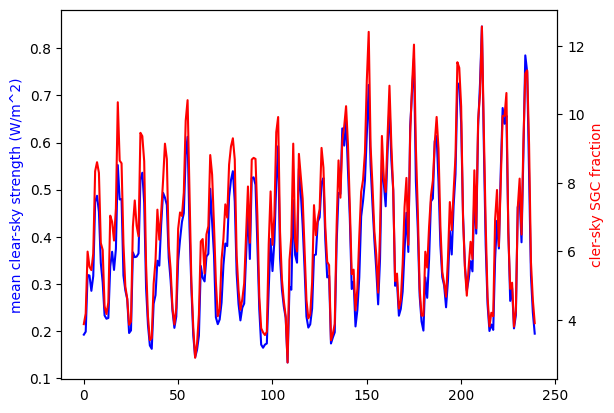

In [7]:
# test look at SST vs SGC timing
fig, ax1 = plt.subplots()
ax1.plot(lat_weighted_mean(SGE_ts.SGE_occ_clr*SGE_ts.SGE_str_clr).resample(time='M', skipna=True).mean(), color='b')
ax1.set_ylabel('mean clear-sky strength (W/m^2)', color='b')
ax2=ax1.twinx()
ax2.plot(frc_clr_mm.resample(time='M', skipna=True).mean(), color='r')
ax2.set_ylabel('cler-sky SGC fraction', color='r')

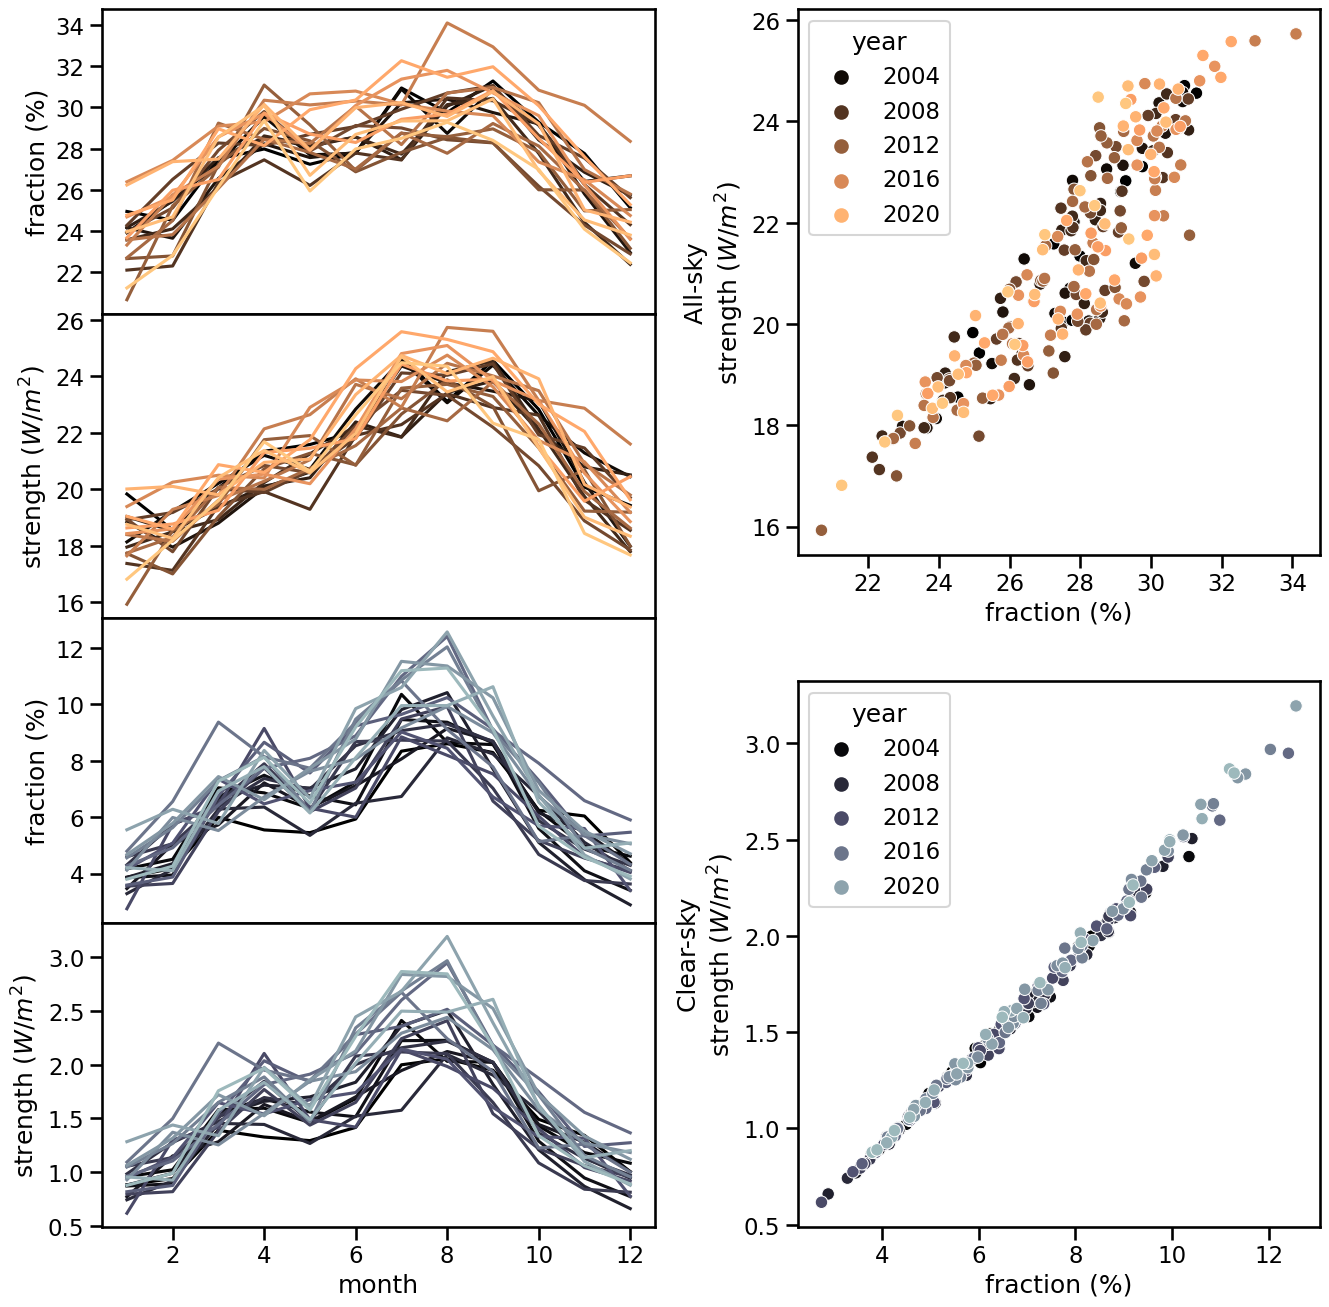

In [10]:
#Figure 3:

with sns.plotting_context("talk"):
 
    fig = plt.figure(figsize=(14,14))
    gs_left = gridspec.GridSpec(ncols=4, nrows=4, hspace = 0.0, wspace = 0.5)
    gs_right = gridspec.GridSpec(ncols=4, nrows=4, hspace=0.6, wspace=1)
    fig.subplots_adjust(left=0.08, right=0.95, bottom=0.08, top=0.95)

    ax1 = fig.add_subplot(gs_left[0,0:2])
    sns.lineplot(ax=ax1,data=df_ALLmm, x='month',y='SGE_frac_all2',hue='year',palette='copper',legend=False)
    ax1.set_ylabel('fraction (%)')

    ax2 = fig.add_subplot(gs_left[1,0:2])
    sns.lineplot(ax=ax2,data=df_ALLmm, x='month',y='SGE_str_all',hue='year',palette='copper',legend=False)
    ax2.set_ylabel('strength ($W/m^2$)')

    ax3 = fig.add_subplot(gs_left[2,0:2])
    sns.lineplot(data=df_CLRmm, x='month',y='SGE_frac_clr2',hue='year',palette=cm.get_sub_cmap('bone', 0.0, 0.7),legend=False)
    ax3.set_ylabel('fraction (%)')

    ax4 = fig.add_subplot(gs_left[3,0:2])
    sns.lineplot(data=df_CLRmm, x='month',y='SGE_str_clr',hue='year',palette=cm.get_sub_cmap('bone', 0.0, 0.7),legend=False)
    ax4.set_ylabel('strength ($W/m^2$)')

    ax5 = fig.add_subplot(gs_right[0:2,2:4])
    sns.scatterplot(ax=ax5,data=df_ALLmm,x='SGE_frac_all2',y='SGE_str_all',hue='year',palette='copper')
    #sns.regplot(ax=ax5,data=df_ALL,x='SGE_frac_all',y='SGE_pw_all',scatter=False,color='orange',ci=None,robust=True)
    ax5.set_ylabel(' All-sky \nstrength ($W/m^2$)')
    ax5.set_xlabel('fraction (%)')

    ax6 = fig.add_subplot(gs_right[2:4,2:4])
    sns.scatterplot(ax=ax6,data=df_CLRmm,x='SGE_frac_clr2',y='SGE_str_clr',hue='year',palette=cm.get_sub_cmap('bone', 0.0, 0.7))
    #sns.regplot(ax=ax6,data=df_CLR,x='SGE_frac_clr',y='SGE_pw_clr',scatter=False,color='skyblue',ci=None,robust=True)
    ax6.set_ylabel(' Clear-sky \nstrength ($W/m^2$)')
    ax6.set_xlabel('fraction (%)')

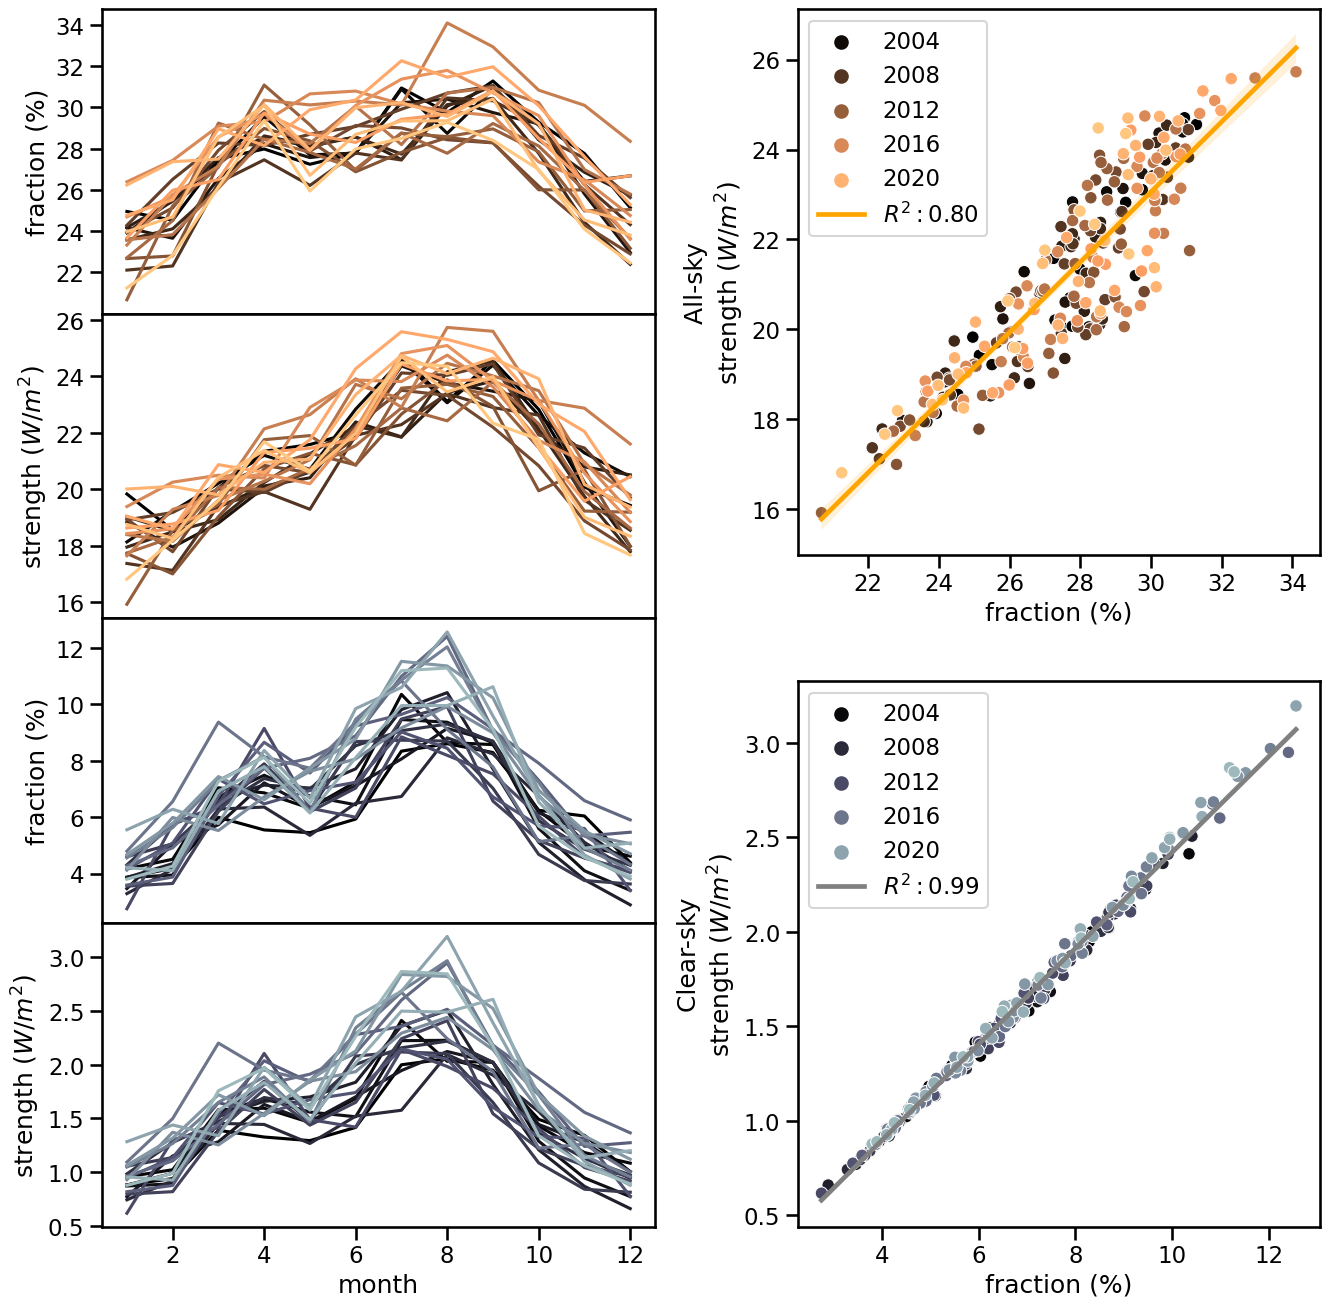

In [11]:
#Figure 3 with linear correlation coefficients:

with sns.plotting_context("talk"):
 
    fig = plt.figure(figsize=(14,14))
    gs_left = gridspec.GridSpec(ncols=4, nrows=4, hspace = 0.0, wspace = 0.5)
    gs_right = gridspec.GridSpec(ncols=4, nrows=4, hspace=0.6, wspace=1)
    fig.subplots_adjust(left=0.08, right=0.95, bottom=0.08, top=0.95)

    ax1 = fig.add_subplot(gs_left[0,0:2])
    sns.lineplot(ax=ax1,data=df_ALLmm, x='month',y='SGE_frac_all2',hue='year',palette='copper',legend=False)
    ax1.set_ylabel('fraction (%)')

    ax2 = fig.add_subplot(gs_left[1,0:2])
    sns.lineplot(ax=ax2,data=df_ALLmm, x='month',y='SGE_str_all',hue='year',palette='copper',legend=False)
    ax2.set_ylabel('strength ($W/m^2$)')

    ax3 = fig.add_subplot(gs_left[2,0:2])
    sns.lineplot(data=df_CLRmm, x='month',y='SGE_frac_clr2',hue='year',palette=cm.get_sub_cmap('bone', 0.0, 0.7),legend=False)
    ax3.set_ylabel('fraction (%)')

    ax4 = fig.add_subplot(gs_left[3,0:2])
    sns.lineplot(data=df_CLRmm, x='month',y='SGE_str_clr',hue='year',palette=cm.get_sub_cmap('bone', 0.0, 0.7),legend=False)
    ax4.set_ylabel('strength ($W/m^2$)')

    ax5 = fig.add_subplot(gs_right[0:2,2:4])
    sns.scatterplot(ax=ax5,data=df_ALLmm,x='SGE_frac_all2',y='SGE_str_all',hue='year',palette='copper')
    slope, intcpt, r_value1, p_value, stderr = stats.linregress(df_ALLmm['SGE_frac_all2'],df_ALLmm['SGE_str_all'])
    label1 = r'$R^2:{0:.2f}$'.format(r_value1**2)
    sns.regplot(ax=ax5,data=df_ALLmm,x='SGE_frac_all2',y='SGE_str_all',scatter=False,line_kws={'color':'orange'},ci=95,label=label1)
    ax5.legend()
    ax5.set_ylabel(' All-sky \nstrength ($W/m^2$)')
    ax5.set_xlabel('fraction (%)')

    ax6 = fig.add_subplot(gs_right[2:4,2:4])
    sns.scatterplot(ax=ax6,data=df_CLRmm,x='SGE_frac_clr2',y='SGE_str_clr',hue='year',palette=cm.get_sub_cmap('bone', 0.0, 0.7))
    slope, intcpt, r_value2, p_value, stderr = stats.linregress(df_CLRmm['SGE_frac_clr2'],df_CLRmm['SGE_str_clr'])
    label2 = r'$R^2:{0:.2f}$'.format(r_value2**2)
    sns.regplot(ax=ax6,data=df_CLRmm,x='SGE_frac_clr2',y='SGE_str_clr',scatter=False,line_kws={'color':'grey'},ci=95,label=label2)
    ax6.legend()
    ax6.set_ylabel(' Clear-sky \nstrength ($W/m^2$)')
    ax6.set_xlabel('fraction (%)')

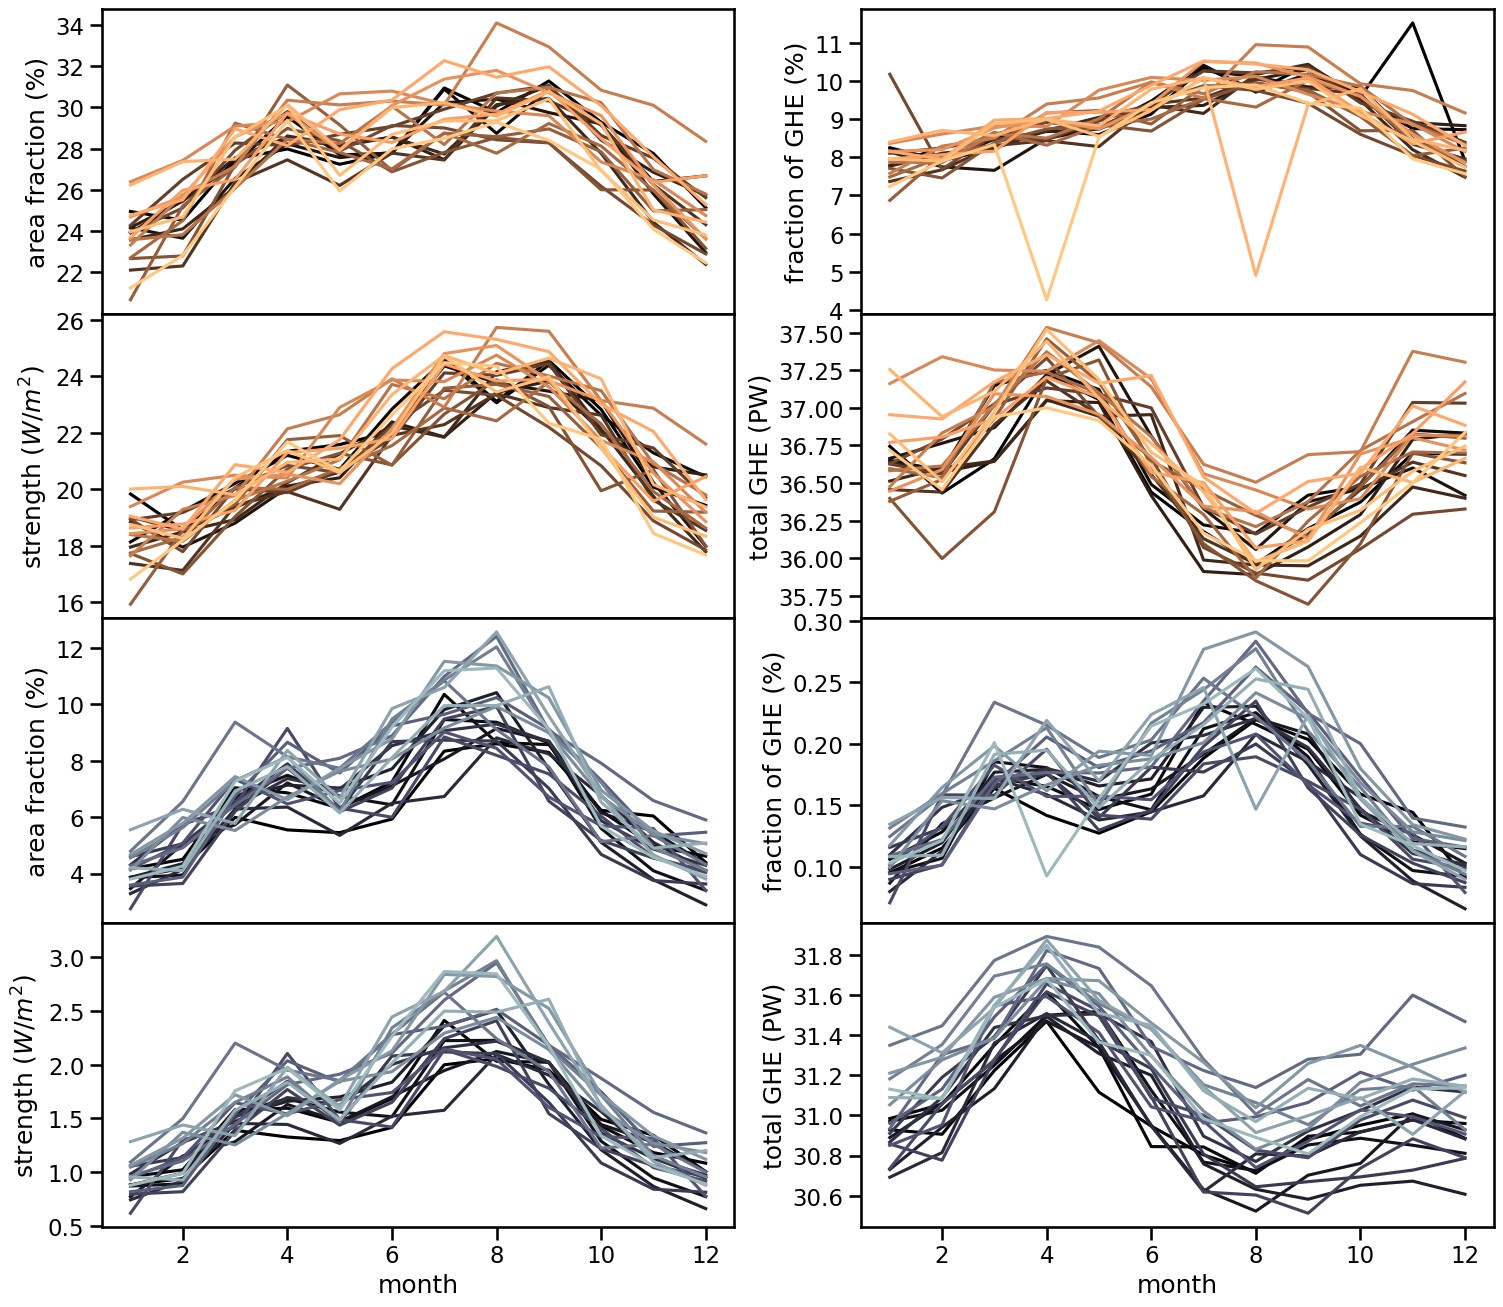

In [ ]:
#Figure 3 with 3rd column showing strength vs SST, with fraction of total tropical greenhouse:

#calculate fraction of tropics area in SGE (ocean area between 35N/S)
xlon, ylat = np.meshgrid(SGE_ts.lon, SGE_ts.lat)
R = earth_radius(ylat)
dlat = np.deg2rad(np.gradient(ylat, axis=0))
dlon = np.deg2rad(np.gradient(xlon, axis=1))
dy = dlat * R
dx = dlon * R * np.cos(np.deg2rad(ylat))
area_grid = dy * dx * landmask.sel(lat=ylat[:,0])
tot_area = area_grid.sum()


#calculate tropical greenhouse effect for all-sky and clear-sky conditions:
CERES_EBAF = xr.open_dataset('CERES_EBAF_Ed4.2_Subset_200301-202212.nc')
GHE_all = ((CERES_EBAF.sfc_lw_up_all_mon.sel(lat=slice(-35,35))-CERES_EBAF.toa_lw_all_mon.sel(lat=slice(-35,35)))*area_grid).sum(dim=['lat','lon'])
GHE_clr = ((CERES_EBAF.sfc_lw_up_clr_c_mon.sel(lat=slice(-35,35))-CERES_EBAF.toa_lw_clr_c_mon.sel(lat=slice(-35,35)))*area_grid).sum(dim=['lat','lon'])
GHE_all2 = GHE_all/1e15
GHE_clr2 = GHE_clr/1e15

integrated_SGC_all = (SGE_ts.SGE_pw_all.resample(time='M', skipna=True).mean()).assign_coords(time=GHE_all.time)
integrated_SGC_clr = (SGE_ts.SGE_pw_clr.resample(time='M', skipna=True).mean()).assign_coords(time=GHE_all.time)

GHE_frac_all = (integrated_SGC_all/GHE_all)*100
GHE_frac_clr = (integrated_SGC_clr/GHE_clr)*100

GHE_df = pd.concat([GHE_all2.to_dataframe(name='GHE_all'),GHE_clr2.to_dataframe(name='GHE_clr'),GHE_frac_all.to_dataframe(name='GHE_frac_all'),GHE_frac_clr.to_dataframe(name='GHE_frac_clr')], axis=1)
GHE_df['month'] = GHE_df.index.month
GHE_df['year'] = GHE_df.index.year


with sns.plotting_context("talk"):
 
    fig = plt.figure(figsize=(16,14))
    gs_left = gridspec.GridSpec(ncols=2, nrows=4, hspace = 0.0, wspace = 0.2)
    fig.subplots_adjust(left=0.08, right=0.95, bottom=0.08, top=0.95)

    ax1 = fig.add_subplot(gs_left[0,0])
    a1=sns.lineplot(ax=ax1,data=df_ALLmm, x='month',y='SGE_frac_all2',hue='year',palette='copper',legend=False)
    ax1.set_ylabel('Area fraction (%)')
    sns.move_legend(a1, loc='lower center', ncols=5, title='All-sky', borderpad=0.1, labelspacing=0.1, handlelength=0.5, handletextpad=0.2, columnspacing=0.5)

    ax2 = fig.add_subplot(gs_left[1,0])
    sns.lineplot(ax=ax2,data=df_ALLmm, x='month',y='SGE_str_all',hue='year',palette='copper',legend=False)
    ax2.set_ylabel('Strength ($W/m^2$)')

    ax3 = fig.add_subplot(gs_left[2,0])
    a3=sns.lineplot(data=df_CLRmm, x='month',y='SGE_frac_clr2',hue='year',palette=cm.get_sub_cmap('bone', 0.0, 0.7),legend=False)
    ax3.set_ylabel('Area fraction (%)')
    sns.move_legend(a3, loc='lower center', ncols=5, title='All-sky', borderpad=0.1, labelspacing=0.1, handlelength=0.5, handletextpad=0.2, columnspacing=0.5)

    ax4 = fig.add_subplot(gs_left[3,0])
    sns.lineplot(data=df_CLRmm, x='month',y='SGE_str_clr',hue='year',palette=cm.get_sub_cmap('bone', 0.0, 0.7),legend=False)
    ax4.set_ylabel('Strength ($W/m^2$)')

    ax5 = fig.add_subplot(gs_left[0,1])
    sns.lineplot(ax=ax5,data=GHE_df, x='month',y='GHE_frac_all',hue='year',palette='copper',legend=False)
    ax5.set_ylabel('Fraction of GHE (%)')

    ax6 = fig.add_subplot(gs_left[1,1])
    sns.lineplot(ax=ax6,data=GHE_df, x='month',y='GHE_all',hue='year',palette='copper',legend=False)
    ax6.set_ylabel('Total GHE (PW)')

    ax7 = fig.add_subplot(gs_left[2,1])
    sns.lineplot(ax=ax7,data=GHE_df, x='month',y='GHE_frac_clr',hue='year',palette=cm.get_sub_cmap('bone', 0.0, 0.7),legend=False)
    ax7.set_ylabel('Fraction of GHE (%)')

    ax8 = fig.add_subplot(gs_left[3,1])
    sns.lineplot(ax=ax8,data=GHE_df, x='month',y='GHE_clr',hue='year',palette=cm.get_sub_cmap('bone', 0.0, 0.7),legend=False)
    ax8.set_ylabel('Total GHE (PW)')
  

In [13]:
#Figure 4 data: maps of frequency and strength

#seasonal means
occ_all_seas = SGE_ts.SGE_occ_all.where(SGE_ts['airs_flag']==0).groupby('time.season').mean('time')*100
occ_clr_seas = SGE_ts.SGE_occ_clr.groupby('time.season').mean('time')*100
str_all_seas = SGE_ts.SGE_str_all.where(SGE_ts['airs_flag']==0).groupby('time.season').mean('time')
str_clr_seas = SGE_ts.SGE_str_clr.groupby('time.season').mean('time')

#annual mean
occ_all_ann = SGE_ts.SGE_occ_all.where(SGE_ts['airs_flag']==0).mean('time')*100
occ_clr_ann = SGE_ts.SGE_occ_clr.mean('time')*100
str_all_ann = SGE_ts.SGE_str_all.where(SGE_ts['airs_flag']==0).mean('time')
str_clr_ann = SGE_ts.SGE_str_clr.mean('time')



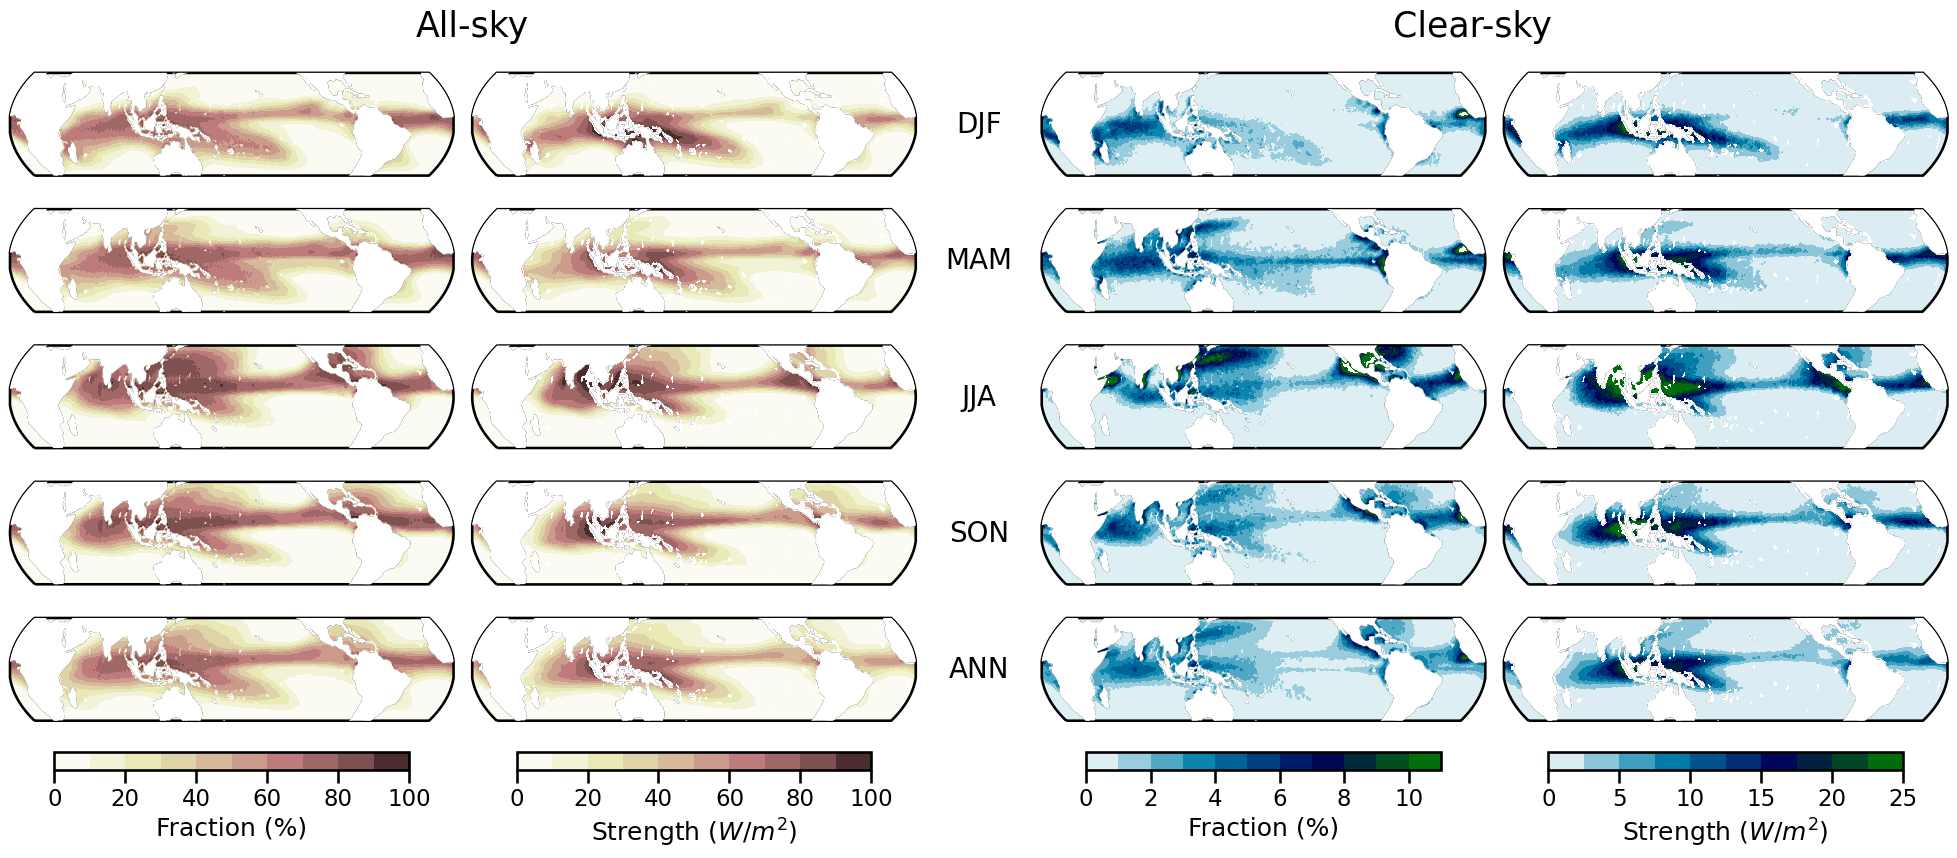

In [14]:
#Figure 4:

import matplotlib.ticker as ticker
with sns.plotting_context('talk'):

    fig = plt.figure(figsize=(25,10))
    proj=ccrs.Mollweide(central_longitude=180)
    lons = occ_all_seas.lon
    lats = occ_all_seas.lat
    all_cmap = 'pink_r'
    clr_cmap = 'ocean_r'
    gs = gridspec.GridSpec(ncols=5, nrows=6, hspace = 0.0, wspace = 0.05, height_ratios=[1,1,1,1,1,0.43], width_ratios=[1,1,0.2,1,1], figure=fig)

    ax5 = fig.add_subplot(gs[4,0], projection=proj)
    im=plt.contourf(lons,lats,occ_all_ann,10,transform=ccrs.PlateCarree(),cmap=all_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    ax1 = fig.add_subplot(gs[0,0], projection=proj)
    plt.contourf(lons,lats,occ_all_seas.sel(season='DJF'),im.levels,transform=ccrs.PlateCarree(),cmap=all_cmap)
    #im = ax1.pcolormesh(lons,lats,occ_all_seas.sel(season='DJF'), transform=ccrs.PlateCarree(), cmap=all_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=5)
    plt.gca().coastlines()

    #plt.subplot(445, projection=proj)
    ax2 = fig.add_subplot(gs[1,0], projection=proj)
    plt.contourf(lons,lats,occ_all_seas.sel(season='MAM'),im.levels,transform=ccrs.PlateCarree(),cmap=all_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    #plt.subplot(449, projection=proj)
    ax3 = fig.add_subplot(gs[2,0], projection=proj)
    plt.contourf(lons,lats,occ_all_seas.sel(season='JJA'),im.levels,transform=ccrs.PlateCarree(),cmap=all_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    #ax4=plt.subplot(4,4,13, projection=proj)
    ax4 = fig.add_subplot(gs[3,0], projection=proj)
    plt.contourf(lons,lats,occ_all_seas.sel(season='SON'),im.levels,transform=ccrs.PlateCarree(),cmap=all_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    ax6 = fig.add_subplot(gs[5,0], projection=proj)
    plt.colorbar(im,ax=ax6, location='bottom',label='Fraction (%)',fraction=0.75,shrink=0.8)
    fig.delaxes(ax6)


    ax11 = fig.add_subplot(gs[4,1], projection=proj)
    im2=plt.contourf(lons,lats,str_all_ann,10,transform=ccrs.PlateCarree(),cmap=all_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    ax7 = fig.add_subplot(gs[0,1], projection=proj)
    im2=plt.contourf(lons,lats,str_all_seas.sel(season='DJF'),im2.levels,transform=ccrs.PlateCarree(),cmap=all_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    #plt.subplot(446, projection=proj)
    ax8 = fig.add_subplot(gs[1,1], projection=proj)
    plt.contourf(lons,lats,str_all_seas.sel(season='MAM'),im2.levels,transform=ccrs.PlateCarree(),cmap=all_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    #plt.subplot(4,4,10, projection=proj)
    ax9 = fig.add_subplot(gs[2,1], projection=proj)
    plt.contourf(lons,lats,str_all_seas.sel(season='JJA'),im2.levels,transform=ccrs.PlateCarree(),cmap=all_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    #ax5=plt.subplot(4,4,14, projection=proj)
    ax10 = fig.add_subplot(gs[3,1], projection=proj)
    plt.contourf(lons,lats,str_all_seas.sel(season='SON'),im2.levels,transform=ccrs.PlateCarree(),cmap=all_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    ax12 = fig.add_subplot(gs[5,1], projection=proj)
    plt.colorbar(im2,ax=ax12, location='bottom',label='Strength ($W/m^2$)',fraction=0.75,shrink=0.8)
    fig.delaxes(ax12)


    ax16 = fig.add_subplot(gs[4,3], projection=proj)
    im3=plt.contourf(lons,lats,occ_clr_ann,10,transform=ccrs.PlateCarree(),cmap=clr_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    ax13 = fig.add_subplot(gs[0,3], projection=proj)
    im3=plt.contourf(lons,lats,occ_clr_seas.sel(season='DJF'),im3.levels,transform=ccrs.PlateCarree(),cmap=clr_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    #plt.subplot(447, projection=proj)
    ax14 = fig.add_subplot(gs[1,3], projection=proj)
    plt.contourf(lons,lats,occ_clr_seas.sel(season='MAM'),im3.levels,transform=ccrs.PlateCarree(),cmap=clr_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    #plt.subplot(4,4,11, projection=proj)
    ax15 = fig.add_subplot(gs[2,3], projection=proj)
    plt.contourf(lons,lats,occ_clr_seas.sel(season='JJA'),im3.levels,transform=ccrs.PlateCarree(),cmap=clr_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    #ax6=plt.subplot(4,4,15, projection=proj)
    ax15 = fig.add_subplot(gs[3,3], projection=proj)
    plt.contourf(lons,lats,occ_clr_seas.sel(season='SON'),im3.levels,transform=ccrs.PlateCarree(),cmap=clr_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    ax17 = fig.add_subplot(gs[5,3], projection=proj)
    l1=im3.levels
    plt.colorbar(im3,ax=ax17, location='bottom',label='Fraction (%)',fraction=0.75,shrink=0.8,ticks=l1[::2])
    fig.delaxes(ax17)   

    ax22 = fig.add_subplot(gs[4,4], projection=proj)
    im4=plt.contourf(lons,lats,str_clr_ann,10,transform=ccrs.PlateCarree(),cmap=clr_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    ax18 = fig.add_subplot(gs[0,4], projection=proj)
    im4=plt.contourf(lons,lats,str_clr_seas.sel(season='DJF'),im4.levels,transform=ccrs.PlateCarree(),cmap=clr_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    #plt.subplot(448, projection=proj)
    ax19 = fig.add_subplot(gs[1,4], projection=proj)
    plt.contourf(lons,lats,str_clr_seas.sel(season='MAM'),im4.levels,transform=ccrs.PlateCarree(),cmap=clr_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    #plt.subplot(4,4,12, projection=proj)
    ax20 = fig.add_subplot(gs[2,4], projection=proj)
    plt.contourf(lons,lats,str_clr_seas.sel(season='JJA'),im4.levels,transform=ccrs.PlateCarree(),cmap=clr_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    #ax7=plt.subplot(4,4,16, projection=proj)
    ax21 = fig.add_subplot(gs[3,4], projection=proj)
    plt.contourf(lons,lats,str_clr_seas.sel(season='SON'),im4.levels,transform=ccrs.PlateCarree(),cmap=clr_cmap)
    plt.gca().add_feature(cartopy.feature.LAND, color='white',zorder=10)
    plt.gca().coastlines()

    ax23 = fig.add_subplot(gs[5,4], projection=proj)
    l2 = im4.levels
    plt.colorbar(im4,ax=ax23, location='bottom',label='Strength ($W/m^2$)',fraction=0.75,shrink=0.8, ticks=l2[::2])
    fig.delaxes(ax23)

#fig.tight_layout()
fig.subplots_adjust(top=0.85)  
plt.figtext(0.31,0.88,"All-sky", va="center", ha="center", size=25)
plt.figtext(0.71,0.88,"Clear-sky", va="center", ha="center", size=25)
#add labels into center column:
labels = ['DJF','MAM','JJA','SON','ANN']
for ii in range(5):
    ax_label = fig.add_subplot(gs[ii,2])
    ax_label.text(0.5,0.5,labels[ii], horizontalalignment='center', verticalalignment='center', transform=ax_label.transAxes, fontsize=20)
    ax_label.set_axis_off()


In [4]:
# linear regression on each gridpoint to get significance of trends:
vars = ['str_clr','str_all', 'occ_all','occ_clr']
for var in vars:
    trends = np.zeros((70,360))
    p_values = np.ones((70,360))*np.nan
    ts = SGE_ts['SGE_'+var].where(SGE_ts['airs_flag']==0).sel(time=slice('2003', '2022')).resample(time='M', skipna=True).mean()

    # per gridpoint linear regression:
    for ii in np.arange(70):
        for jj in np.arange(360):
            ts_mm = ts[:,ii,jj].to_dataframe()
            ts_mm.index = pd.to_datetime(ts_mm.index)
            sm = ts_mm.groupby([ts_mm.index.day, ts_mm.index.month]).transform('mean')
            ts_ds = (ts_mm - sm).reset_index() #remove seasonal mean
            idx = np.isfinite(ts_ds['SGE_'+var])
            if any(idx):
                t = np.arange(np.size(ts_ds['SGE_'+var]))
                results = linregress(t[idx], ts_ds['SGE_'+var][idx])
                trends[ii,jj] = results.slope
                p_values[ii,jj] = results.pvalue

    #save to dataframe:
    trend_da = xr.DataArray(
        trends,
        dims=('lat', 'lon'),
        coords={'lat': ts.lat.values, 'lon': ts.lon.values},
        name=f'{var}_trend',
    )

    pval_da = xr.DataArray(
        p_values,
        dims=('lat', 'lon'),
        coords={'lat': ts.lat.values, 'lon': ts.lon.values},
        name=f'{var}_pvalue',
    )

    ds_out = xr.Dataset({
    f'{var}_trend': trend_da,
    f'{var}_pvalue': pval_da
    })

    ds_out.to_netcdf(f'{var}_trends.nc')



c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\made2928\anaconda3\envs\sge_trends_env\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


In [5]:
#get trend already calculate from above cell.
trends_occ_all = xr.open_dataset('occ_all_trends.nc')
trends_str_all = xr.open_dataset('str_all_trends.nc')
trends_occ_clr = xr.open_dataset('occ_clr_trends.nc')
trends_str_clr = xr.open_dataset('str_clr_trends.nc')


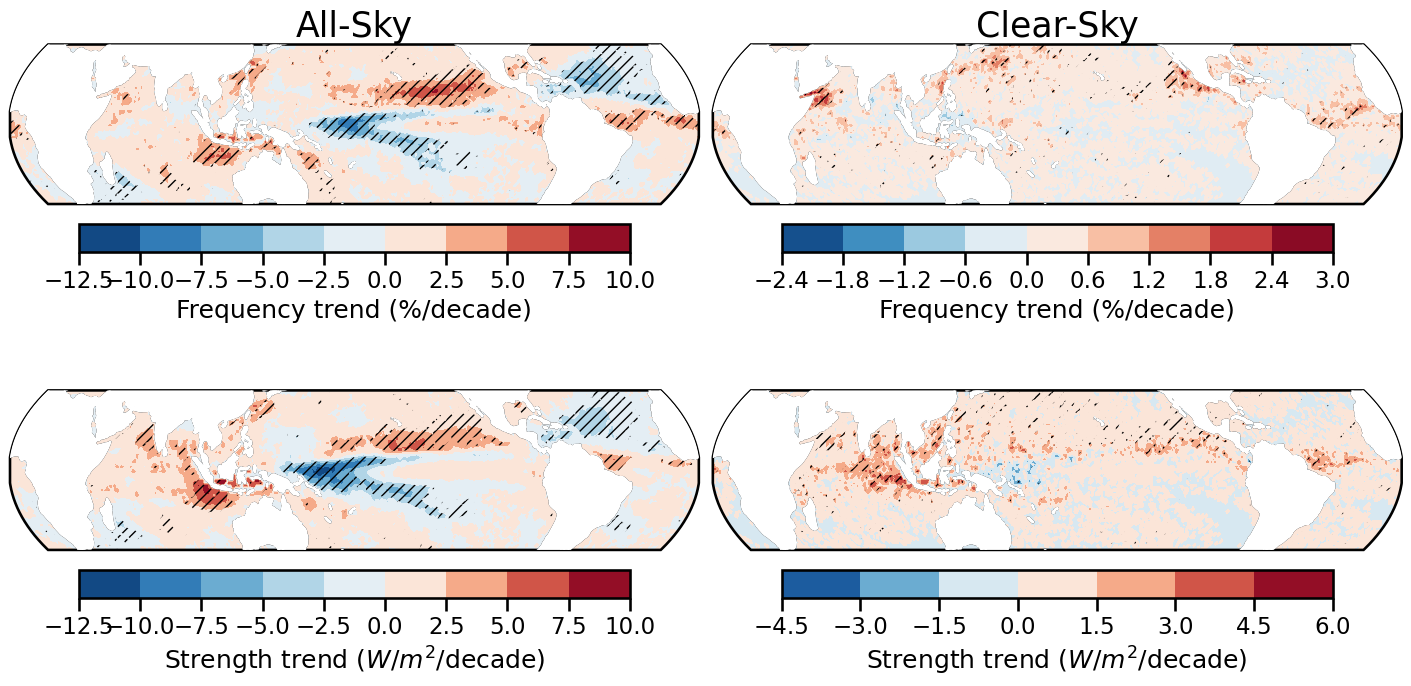

In [7]:
#Figure 5:

with sns.plotting_context('talk'):
    from matplotlib.colors import TwoSlopeNorm
    proj=ccrs.Mollweide(central_longitude=180)
    fig, axs = plt.subplots(2, 2, sharex=True, constrained_layout=True, figsize=(14,7),  subplot_kw={'projection': proj})
    tnd_cmap = 'RdBu_r'
    lats=SGE_ts.lat
    lons=SGE_ts.lon
     
    m0=axs[0,0].contourf(lons,lats,trends_occ_all['occ_all_trend']*12000,8,transform=ccrs.PlateCarree(),cmap=tnd_cmap,norm=TwoSlopeNorm(vcenter=0))
    axs[0,0].contourf(lons, lats, trends_occ_all['occ_all_pvalue'], colors='none', levels=[0,0.05], 
                    hatches=['///'], alpha=0., transform=ccrs.PlateCarree())
    cb0=plt.colorbar(m0, ax=axs[0,0], location='bottom',fraction=0.75,shrink=0.8,label='Frequency trend (%/decade)')
    #cb0.set_ticks([-10.0,-5.0,0.0,5.0,10.0])
    axs[0,0].add_feature(cartopy.feature.LAND, color='white',zorder=10)
    axs[0,0].coastlines()
    axs[0,0].set_title('All-Sky',fontsize=25)

    m2=axs[1,0].contourf(lons,lats,trends_str_all['str_all_trend']*120,8,transform=ccrs.PlateCarree(),cmap=tnd_cmap,norm=TwoSlopeNorm(vcenter=0))
    axs[1,0].contourf(lons, lats, trends_str_all['str_all_pvalue'], colors='none', levels=[0,0.05],
                    hatches=['///'], alpha=0., transform=ccrs.PlateCarree())
    cb1=plt.colorbar(m2,ax=axs[1,0],location='bottom',fraction=0.75,shrink=0.8, label='Strength trend ($W/m^2/$decade)')
    #cb1.set_ticks([-10.0,-5.0,0.0,5.0,10.0])
    axs[1,0].add_feature(cartopy.feature.LAND, color='white',zorder=10)
    axs[1,0].coastlines()

    m1=axs[0,1].contourf(lons,lats,trends_occ_clr['occ_clr_trend']*12000,8,transform=ccrs.PlateCarree(),cmap=tnd_cmap,norm=TwoSlopeNorm(vcenter=0))
    axs[0,1].contourf(lons, lats, trends_occ_clr['occ_clr_pvalue'], colors='none', levels=[0,0.05],
                    hatches=['///'], alpha=0., transform=ccrs.PlateCarree())
    cb2=plt.colorbar(m1,ax=axs[0,1],location='bottom',fraction=0.75,shrink=0.8, label='Frequency trend (%/decade)')
    #cb2.set_ticks([-2.4,-1.2,0.0,1.2,1.8,3.0])
    axs[0,1].add_feature(cartopy.feature.LAND, color='white',zorder=10)
    axs[0,1].coastlines()
    axs[0,1].set_title('Clear-Sky',fontsize=25)

    m3=axs[1,1].contourf(lons,lats,trends_str_clr['str_clr_trend']*120,8,transform=ccrs.PlateCarree(),cmap=tnd_cmap,norm=TwoSlopeNorm(vcenter=0))
    axs[1,1].contourf(lons, lats, trends_str_clr['str_clr_pvalue'], colors='none', levels=[0,0.05],
                    hatches=['///'], alpha=0., transform=ccrs.PlateCarree())
    cb3=plt.colorbar(m3,ax=axs[1,1],location='bottom',fraction=0.75,shrink=0.8, label='Strength trend ($W/m^2/$decade)')
    axs[1,1].add_feature(cartopy.feature.LAND, color='white',zorder=10)
    axs[1,1].coastlines()

fig.savefig('../../Figure5_SGE_trends.png', dpi=300)
 